0j

(-0.025703726302124114+2.4588809444674175e-07j)

"\nwith np.nditer(Uxp, op_flags=['readwrite']) as it:\n   for x in it:\n    if np.abs(x)<1E-10:\n        x[...] = 0.0\n    elif np.abs(np.real(x))<1E-10:\n        x[...] = x-np.real(x)\n    elif np.abs(np.imag(x))<1E-10:\n        x[...] = x-1.0j*np.imag(x)\n        \n"

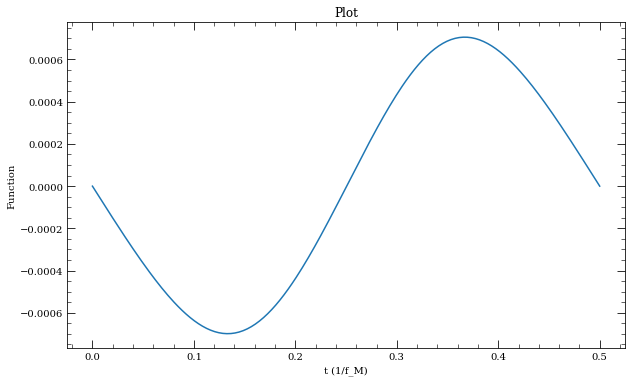

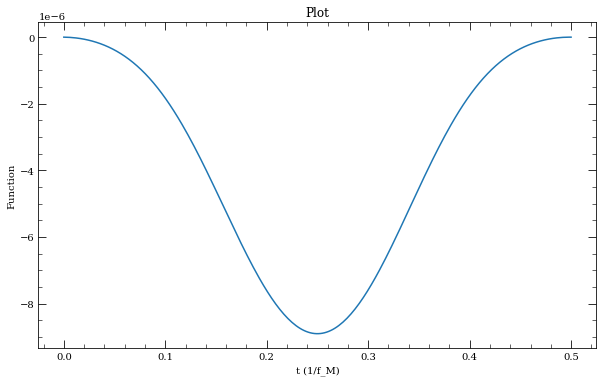

In [ ]:
# %matplotlib inline
'''Module Import'''
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np
import scipy as sp
# Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output
import arc
from arc import *
from sympy import*
import sympy as sym
import scipy.linalg as ling
import numpy.linalg as nling
from sympy.physics.quantum import TensorProduct as tens
from sympy import Matrix
import itertools
from itertools import combinations
from qutip import *
import pandas as pd
from IPython.display import display, Math, Latex

import scipy.integrate as integrate
import scipy.special as special
from scipy import interpolate
import itertools as iter
import csv

'''Constants'''
#Time units in ps (10E-12)
qe=1.609E-19 #Charge
eps0=8.8541878128E-12 #Free Space Permittivity
mu0=4.0*pi*1E-7 #Free Space Permeability
hbar=1.0545718E-34 #Reduced Planck's constant
c=2.99792458E-4 #Speed of Light
e=1.60217662E-19 #Charge
a_0=5.291772109E-11 #Debye
ea_0 = 8.51161e-30

'''Transition Rates'''





use_rwa = True #Use Rotoating Wave Approximation (N/A)




def L(args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl0 = args['t_l']
    tc0 = args['t_c']
    tm0 = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w0 = args['w_0']
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)

    sums = 0
    sumf = 0
    for i in [-1,0,1]:
        #for k in [3.0]:
        for k in np.arange(-nt,nt+1,1):
            tc = args['t_c']+i*2.0*args['t_m']
            tm = args['t_m']+i*2.0*args['t_m']
            tl = args['t_l']+i*2.0*args['t_m']
  
            sums+=(-1.0/(2.0*tm0))*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-0+1j*tau**2*((2*w0+d+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-0+1j*tau**2*((2*w0+d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(0*(2*w0+d+k*(wmod))-tc*(2*w0+d)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-0+1j*tau**2*((-d+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-0+1j*tau**2*((-d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(0*(-d+k*(wmod))-tc*(-d)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2)))


            sumf+=1.0/(2.0*tm0)*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-2.0*tm0+1j*tau**2*((2*w0+d+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-2.0*tm0+1j*tau**2*((2*w0+d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(2.0*tm0*(2*w0+d+k*(wmod))-tc*(2*w0+d)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-2.0*tm0+1j*tau**2*((-d+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-2.0*tm0+1j*tau**2*((-d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(2.0*tm0*(-d+k*(wmod))-tc*(-d)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2)))
        
    return sums+1.0*sumf

#Gauge argument in exponential matrix term
def F(tx, args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl0 = args['t_l']
    tc0 = args['t_c']
    tm0 = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w0 = args['w_0']
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)
    t=tx-0.0*np.floor((tx)/(2.0*tm0))*2.0*tm0
    kt=np.floor((tx)/(2.0*tm0))
    sums = 0
    sumf = 0
    termm=0.0
    
    for i in [-1,0,1]:
        #for k in [3.0]:
        for k in np.arange(-nt,nt+1,1):
            tc = args['t_c']+i*2.0*args['t_m']
            tm = args['t_m']+i*2.0*args['t_m']
            tl = args['t_l']+i*2.0*args['t_m']
            
        
        
        
            sums+=-0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-tx+1j*tau**2*((2*w0+d+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-tx+1j*tau**2*((2*w0+d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(tx*(2*w0+d+k*(wmod))-tc*(2*w0+d)-tm*(k*wmod))-(tc-tx)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-tx+1j*tau**2*((-d+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-tx+1j*tau**2*((-d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(tx*(-d+k*(wmod))-tc*(-d)-tm*(k*wmod))-(tc-tx)**2/(2.0*tau**2)))

            sums+=(1.0-1.0*tx/(2.0*tm0))*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-0+1j*tau**2*((2*w0+d+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-0+1j*tau**2*((2*w0+d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(0*(2*w0+d+k*(wmod))-tc*(2*w0+d)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-0+1j*tau**2*((-d+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-0+1j*tau**2*((-d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(0*(-d+k*(wmod))-tc*(-d)-tm*(k*wmod))-(tc-0)**2/(2.0*tau**2)))


            sumf+=1.0*tx/(2.0*tm0)*0.5*np.sqrt(np.pi/2.0)*tau*(1j)**k*R0*\
                    (special.jv(k,A)*(np.exp((tc-2.0*tm0+1j*tau**2*((2*w0+d+k*wmod)))**2/(2.0*tau**2))-\
                    special.erfcx((tc-2.0*tm0+1j*tau**2*((2*w0+d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                    np.exp(1j*(2.0*tm0*(2*w0+d+k*(wmod))-tc*(2*w0+d)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2))+\
                     special.jv(k,-A)*(np.exp((tc-2.0*tm0+1j*tau**2*((-d+k*wmod)))**2/(2.0*tau**2))-\
                      special.erfcx((tc-2.0*tm0+1j*tau**2*((-d+k*wmod)))/(np.sqrt(2.0)*tau)))*\
                      np.exp(1j*(2.0*tm0*(-d+k*(wmod))-tc*(-d)-tm*(k*wmod))-(tc-2.0*tm0)**2/(2.0*tau**2)))
            
            if kt>0:
                for p in [0:kt]:
                    termm+=L(args)*np.exp(1.0j*p
            
                
             
        
    return sums+1.0*sumf

            

#Lindbladian superoperator in interaction operator (removing w0/2 bare state energies)
def Liouv(tx,args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl = args['t_l']
    tc = args['t_c']
    tm = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w0 = args['w_0']
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)
    y1= args['gamma']
    y2= args['depha12']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    G1=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w0+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.cos(w0*(t-tl))
    
    G2=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w0+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.sin(w0*(t-tl))
    
    Lx=np.array([[-(y1/2+y2),0,G2,0.0],
             [0,-(y1/2+y2),G1,0.0],
             [-G2,-G1,-y1,y1*np.sqrt(2.0)],
             [0,0,0,0]])
    
    return Lx


#System, Field, Charge parameters. Dictionary used to store values for convenience
argz = {'Rabi': 1.0E-2*2.0*np.pi, 'tau': 0.7*1.0/8.0*1.0E0,'t_c': 1.0/4.0*1.0E0, 't_l': 1.0/4.0*1.0E0, 't_m': 1.0/4.0*1.0E0,
        'PMphase': 0.0, 'OSphase':0.0,'Grdephase':0.0,'ModAmp': 0.5E0, 'Delta1': -0.4, 'gamma': 1.0E-6*2.0*np.pi,
        'depha12': 0.0E-6, 'w_0': 2.0E-2*np.pi, 'wmod': 2.0E0*np.pi/(0.5),'T': 1.0, 'Nterms':4}
'''
display(F(0.025, argz))
display(argz['Rabi']*integrate.quad(lambda x: np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
    np.cos(argz['Delta1']*(x-argz['t_l'])+argz['ModAmp']*np.cos(argz['wmod']*(x-argz['t_m']))),0.0,0.025,epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0])
'''
display(F(0.0*argz['t_m'],argz))
display(L(argz))


timesxx=np.linspace(0.0*argz['t_m'],2.0*argz['t_m'],250)
result2r=[np.real(F(x,argz))/np.pi for x in timesxx]
result2i=[np.imag(F(x,argz))/np.pi for x in timesxx]
#result2=[(np.real(np.abs(F(x,argz)))*special.sinc(np.abs(F(x,argz))/np.pi))/np.pi for x in timesxx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesxx, result2r, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesxx, result2i, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

times=np.linspace(0.0,2.0*argz['t_m'],1000)
timesev=np.linspace(0.0,2.0*argz['t_m'],1000)

#Gauge function interpolant
Fdata=F(timesev, argz)

def Fxd0(tx):
    term=L(argz)
    for i in [-1,0,1]:
            tc = argz['t_c']+i*2.0*argz['t_m']
            tm = argz['t_m']+i*2.0*argz['t_m']
            tl = argz['t_l']+i*2.0*argz['t_m']
        
            term+=argz['Rabi']*np.exp(-(tx-tc)**2/(2.0*argz['tau']**2))*\
            np.cos((argz['w_0']+argz['Delta1'])*(tx-tl)+argz['ModAmp']*np.cos((argz['wmod'])*(tx-tm)))*\
            np.exp(1.0j*(argz['w_0'])*(tx-tl))
            
    return term

#Derivative of absolute value of Gauge function
def Fxad0(tx,args):
    tm = args['t_m']
    t=tx-0.0*np.floor((tx)/(2.0*tm))*2.0*tm
    t2=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=F(t,args)
    Fxd=Fxd0(t)
    
    if np.abs(t2)>1.0E-8:
        return (np.real(Fx)*np.real(Fxd)+np.imag(Fx)*np.imag(Fxd))/(np.abs(Fx))
    else:
        return (np.real(F(1.0E-8,args))*np.real(Fxd0(1.0E-8))+np.imag(F(1.0E-8,args))*np.imag(Fxd0(1.0E-8)))/(np.abs(F(1.0E-8,args)))
                                                                                                         
    
    

Fxdr = np.real(Fxd0(timesev))
Fxdi = np.imag(Fxd0(timesev))
Fxad00=[Fxad0(x,argz) for x in timesev]
Fxrs = interpolate.splrep(timesev, np.real(Fdata),s=0)
Fxis = interpolate.splrep(timesev, np.imag(Fdata), s=0)
Fxas = interpolate.splrep(timesev, np.abs(Fdata), s=0)
Fxadd = interpolate.splrep(timesev, Fxad00,s=0)
Fxdrs = interpolate.splrep(timesev, Fxdr,s=0)
Fxdis = interpolate.splrep(timesev, Fxdi, s=0)
xnew = np.linspace(0.0,2.0*argz['t_m'],5000)
#ynew = interpolate.splev(xnew, tckr, der=0)


def Rot(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    B1c=1-0.5*np.imag((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)**2
    B2c=1-0.5*np.real((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)**2
    B3c=np.cos(np.abs(Fx))
    A1c=-1/2*np.imag((Fx))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)**2
    E1c=np.imag((Fx))*special.sinc(np.abs(Fx)/np.pi)
    C1c=np.real((Fx))*special.sinc(np.abs(Fx)/np.pi)
    Rotx=np.array([[B1c,A1c,-E1c,0],[A1c,B2c,-C1c,0],[E1c,C1c,B3c,0],[0,0,0,1.0]])
    return Rotx

def Rotd(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-0.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    Fxd=interpolate.splev(t,Fxdrs)+1.0j*interpolate.splev(t,Fxdis)
    Fxad=interpolate.splev(t,Fxadd)
    #display(Fxad)
    j0=special.sinc(0.5*np.abs(Fx)/np.pi)
    j0d=0.5*special.spherical_jn(0,0.5*np.abs(Fx),derivative=True)*Fxad
    j1=special.sinc(np.abs(Fx)/np.pi)
    j1d=special.spherical_jn(0,np.abs(Fx),derivative=True)*Fxad
    #display(j1d)
    B1c=-np.imag((Fx))*np.imag(Fxd)*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.imag((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    B2c=-np.real((Fx))*np.real(Fxd)*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.real((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    B3c=-np.sin(np.abs(Fx))*Fxad
    A1c=-1/2*np.imag((Fxd))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)**2-\
        1/2*np.imag((Fx))*np.real((Fxd))*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.imag((Fx))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    E1c=np.imag((Fxd))*special.sinc(np.abs(Fx)/np.pi)+np.imag((Fx))*j1d
    #display(E1c)
    C1c=np.real(Fxd)*special.sinc(np.abs(Fx)/np.pi)+np.real((Fx))*j1d
    Rotx=np.array([[B1c,A1c,-E1c,0],[A1c,B2c,-C1c,0],[E1c,C1c,B3c,0],[0,0,0,0.0]])
    
    return Rotx

#Interpolation for Gauge transformation operator 
Rotin=np.vectorize(lambda x: Rot(x,argz))
Rotdata=np.array([Rotin(t) for t in timesev])
Rotint=interpolate.CubicSpline(timesev, Rotdata)
Rotintd=Rotint.derivative()

#Gauge Lindbladian term
def Gaugetrans(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-0.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Rotzz=Rot(t,args)
    Rotdzz=Rotd(t,args)
    
    Fxdx=interpolate.splev(t,Fxdrs)+1.0j*interpolate.splev(t,Fxdis)-L(argz)
    Ldr=np.array([[0.0,0.0,-np.imag(Fxdx),0],[0.0,0.0,-np.real(Fxdx),0],[np.imag(Fxdx),np.real(Fxdx),0.0,0],[0,0,0,0.0]])
    
    return np.transpose(Rotzz)@np.matmul(Ldr,(Rotzz))-np.transpose(Rotdzz)@Rotzz

#Gauge Lindbladian terms interpolant

Ggint0=np.array(integrate.quad_vec(lambda x: 2.0*Gaugetrans(x,argz),0.0*argz['t_m'],2.0*argz['t_m'],epsabs=1e-12, epsrel=1e-12, limit=10000)[0])
Ggint0n=np.array(integrate.quad_vec(lambda x: 2.0*x*Gaugetrans(x,argz),0.0*argz['t_m'],2.0*argz['t_m'],epsabs=1e-12, epsrel=1e-12, limit=10000)[0])

Ggtrs=np.vectorize(lambda x: Gaugetrans(x,argz))

Ggdata=np.array([Ggtrs(t) for t in timesev])

Ggint=interpolate.CubicSpline(timesev, Ggdata)

Ggintx=Ggint.antiderivative()

Ggintd=Ggint.derivative()


'''
Lx=np.array([[-G1-G2*A2,G2*A3,G2*C2-np.imag(L(argz)),-G3*B2],
             [G2*A3,-G1-G2*A1,G2*C1-np.real(L(argz)),-G3*B1],
             [G2*C2+np.imag(L(argz)),G2*C1+np.real(L(argz)),-argz['gamma']+G2*(A1+A2),G3*B3],
             [0,0,0,0]])
'''







#Dipole creation and anhillation operator in superoperator picture

sij=np.zeros((4,4),dtype=complex)
sij[0,2]=0.5+0.0j
sij[0,3]=1/np.sqrt(2.0)+0.0j
sij[1,2]=-1.0j/2.0
sij[1,3]=-1.0j/np.sqrt(2.0)
sij[2,0]=-0.5+0.0j
sij[2,1]=+0.5j
sij[3,0]=0.5/np.sqrt(2.0)+0.0j
sij[3,1]=-0.5j/np.sqrt(2.0)
                                                                                                         
sijt=np.zeros((4,4),dtype=complex)
sijt[0,2]=-0.5+0.0j
sijt[0,3]=1/np.sqrt(2.0)+0.0j
sijt[1,2]=-1.0j/2.0
sijt[1,3]=1.0j/np.sqrt(2.0)
sijt[2,0]=0.5+0.0j
sijt[2,1]=0.5j
sijt[3,0]=0.5/np.sqrt(2.0)+0.0j
sijt[3,1]=0.5j/np.sqrt(2.0)



rhozz=np.array([0.0,0.0,1.0,1.0/np.sqrt(2.0)])


'''
with np.nditer(Uxp, op_flags=['readwrite']) as it:
   for x in it:
    if np.abs(x)<1E-10:
        x[...] = 0.0
    elif np.abs(np.real(x))<1E-10:
        x[...] = x-np.real(x)
    elif np.abs(np.imag(x))<1E-10:
        x[...] = x-1.0j*np.imag(x)
        
'''

In [40]:
#Matrix term calculations

G1=argz['gamma']/2.0+argz['depha12']
G2=argz['gamma']/2.0-argz['depha12']
G3=np.sqrt(2.0)*argz['gamma']

#Non-commutative terms

A3n=integrate.quad(lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   special.sinc(np.abs(F(x,argz))/np.pi),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C1n=integrate.quad(lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   (special.sinc(0.5*np.abs(F(x,argz))/np.pi)**2*np.imag(F(x,argz))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C2n=integrate.quad(lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   -(special.sinc(0.5*np.abs(F(x,argz))/np.pi)**2*np.real(F(x,argz))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]


A300n=lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   special.sinc(np.abs(F(x,argz))/np.pi)
C100n=lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   (special.sinc(0.5*np.abs(F(x,argz))/np.pi)**2*np.imag(F(x,argz)))
C200n=lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   -(special.sinc(0.5*np.abs(F(x,argz))/np.pi)**2*np.real(F(x,argz)))


A3sn = interpolate.splrep(timesev, A300n(timesev),s=0)
C1sn = interpolate.splrep(timesev, C100n(timesev),s=0)
C2sn = interpolate.splrep(timesev, C200n(timesev),s=0)

A3san=interpolate.splantider(A3sn, n=1)
C1san=interpolate.splantider(C1sn, n=1)
C2san=interpolate.splantider(C2sn, n=1)

A30xn=integrate.quad(lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   special.sinc(np.abs(F(x,argz))/np.pi)*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C10xn=integrate.quad(lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   (special.sinc(0.5*np.abs(F(x,argz))/np.pi)**2*np.imag(F(x,argz)))*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C20xn=integrate.quad(lambda x: 2.0*argz['Rabi']*np.exp(-(x-argz['t_c'])**2/(2.0*argz['tau']**2))*\
                   np.cos((argz['w_0']+argz['Delta1'])*(x-argz['t_l'])+argz['ModAmp']*np.cos((argz['wmod'])*(x-argz['t_m'])))*\
                   (np.imag(F(x,argz))*np.cos(argz['w_0']*(x-argz['t_l']))-np.real(F(x,argz))*np.sin(argz['w_0']*(x-argz['t_l'])))*\
                   -(special.sinc(0.5*np.abs(F(x,argz))/np.pi)**2*np.real(F(x,argz)))*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]

#Commutative terms
B1=integrate.quad(lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)*np.real(F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
B2=integrate.quad(lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)*np.imag(F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
B3=integrate.quad(lambda x: 2.0*np.cos(np.abs(F(x,argz))),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
A1=integrate.quad(lambda x: 2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*np.real(F(x,argz))**2,0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
A2=integrate.quad(lambda x: 2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*np.imag(F(x,argz))**2,0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
A3=integrate.quad(lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*np.real(F(x,argz))*np.imag(F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C1=integrate.quad(lambda x: 2.0*special.sinc(2.0*np.abs(F(x,argz))/np.pi)*np.real(F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C2=integrate.quad(lambda x: 2.0*special.sinc(2.0*np.abs(F(x,argz))/np.pi)*np.imag(F(x,argz)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]

B100=lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)*np.real(F(x,argz))
B200=lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)*np.imag(F(x,argz))
B300=lambda x: 2.0*np.cos(np.abs(F(x,argz))/np.pi)
A100=lambda x: 2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*np.real(F(x,argz))**2
A200=lambda x: 2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*np.imag(F(x,argz))**2
A300=lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*np.real(F(x,argz))*np.imag(F(x,argz))
C100=lambda x: 2.0*special.sinc(2.0*np.abs(F(x,argz))/np.pi)*np.real(F(x,argz))
C200=lambda x: 2.0*special.sinc(2.0*np.abs(F(x,argz))/np.pi)*np.imag(F(x,argz))

B1s = interpolate.splrep(timesev, B100(timesev),s=0)
B2s = interpolate.splrep(timesev, B200(timesev),s=0)
B3s = interpolate.splrep(timesev, B300(timesev),s=0)
A1s = interpolate.splrep(timesev, A100(timesev),s=0)
A2s = interpolate.splrep(timesev, A200(timesev),s=0)
A3s = interpolate.splrep(timesev, A300(timesev),s=0)
C1s = interpolate.splrep(timesev, C100(timesev),s=0)
C2s = interpolate.splrep(timesev, C200(timesev),s=0)

B1sa=interpolate.splantider(B1s, n=1)
B2sa=interpolate.splantider(B2s, n=1)
B3sa=interpolate.splantider(B3s, n=1)
A1sa=interpolate.splantider(A1s, n=1)
A2sa=interpolate.splantider(A2s, n=1)
A3sa=interpolate.splantider(A3s, n=1)
C1sa=interpolate.splantider(C1s, n=1)
C2sa=interpolate.splantider(C2s, n=1)


#display(integrate.quad(lambda x: special.sinc(np.abs(F(x,argz))/np.pi)*np.real(F(x,argz)),0.0,0.01*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0])
#display(interpolate.splev(0.01*argz['t_m'],B1sa)-interpolate.splev(0.00*argz['t_m'],B1sa))

B10x=integrate.quad(lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)*np.real(F(x,argz))*\
                  (x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
B20x=integrate.quad(lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)*np.imag(F(x,argz))*\
                  (x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
B30x=integrate.quad(lambda x: 2.0*np.cos(np.abs(F(x,argz))/np.pi)*\
                  (x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
A10x=integrate.quad(lambda x: 2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*\
                  np.real(F(x,argz))**2*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
A20x=integrate.quad(lambda x: 2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*\
                  np.imag(F(x,argz))**2*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
A30x=integrate.quad(lambda x: -2.0*special.sinc(np.abs(F(x,argz))/np.pi)**2.0*\
                  np.real(F(x,argz))*np.imag(F(x,argz))*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C10x=integrate.quad(lambda x: 2.0*special.sinc(2.0*np.abs(F(x,argz))/np.pi)*\
                  np.real(F(x,argz))*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]
C20x=integrate.quad(lambda x: 2.0*special.sinc(2.0*np.abs(F(x,argz))/np.pi)*\
                  np.imag(F(x,argz))*(x),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=500)[0]


#Zeroth order Van-Vleck expansion time-independent effective matrix of Quasioperator 

Lx=np.array([[-G1-G2*A2,G2*A3,G2*C2,G3*B2],
             [G2*A3,-G1-G2*A1,G2*C1,G3*B1],
             [G2*C2,G2*C1,-argz['gamma']+G2*(A1+A2),G3*B3],
             [0,0,0,0]])+Ggint0
display(Matrix(Lx))
Lxev=ling.eig(Lx,left=True, right=True)
Kd=np.array([[Lxev[0][0],0,0,0],
   [0,Lxev[0][1],0,0],
   [0,0,Lxev[0][2],0],
   [0,0,0,Lxev[0][3]]])
#display(Matrix(Kd))
PKr=Lxev[2]
#isplay(PKr)
PKri=ling.inv(PKr)
#isplay(PKri)
PKl=Lxev[1]
display('Check eigenvalues for instability')
display(Matrix(Lxev[0]))

#Zeroth order Van-Vleck expansion time-dependent micromotion matrix argument of transformation operator of Quasioperator 
def G0(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    #Commutative terms
   
    B10=B10x-(t+np.pi/wmod)*B1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B1sa)-interpolate.splev(0,B1sa))
    B20=B20x-(t+np.pi/wmod)*B2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B2sa)-interpolate.splev(0,B2sa))
    B30=B30x-(t+np.pi/wmod)*B3+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B3sa)-interpolate.splev(0,B3sa))
    A10=A10x-(t+np.pi/wmod)*A1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A1sa)-interpolate.splev(0,A1sa))
    A20=A20x-(t+np.pi/wmod)*A2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A2sa)-interpolate.splev(0,A2sa))
    A30=A30x-(t+np.pi/wmod)*A3+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A3sa)-interpolate.splev(0,A3sa))
    C10=C10x-(t+np.pi/wmod)*C1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C1sa)-interpolate.splev(0,C1sa))
    C20=C20x-(t+np.pi/wmod)*C2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C2sa)-interpolate.splev(0,C2sa))
        
    #Non-commutative terms
    
    #A30n=A30xn-(t+np.pi/wmod)*(A3n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A3san)-interpolate.splev(0,A3san))    
    #C10n=C10xn-(t+np.pi/wmod)*(C1n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C1san)-interpolate.splev(0,C1san))
    #C20n=C20xn-(t+np.pi/wmod)*(C2n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C2san)-interpolate.splev(0,C2san))
    Gx=Ggint0n-(t+np.pi/wmod)*Ggint0+2.0*np.pi/argz['wmod']*(Ggintx(t)-Ggintx(0.0))
    

    
    L1=np.array([[-G2*A20,G2*A30,G2*C20,G3*B20],
       [G2*A30,-G2*A10,G2*C10,G3*B10],
       [G2*C20,G2*C10,G2*(A10+A20),G3*B30],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+1.0*Gx
    

    
    return L1

def G(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    Fxax=interpolate.splev(t,Fxas)
    #Commutative
    B1r=integrate.quad(lambda x: np.real(-2.0*special.sinc(Fxax/np.pi)*np.real(Fx)*\
                      (np.log(np.exp(1.0j*(np.pi-wmod*(tx-x)))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2r=integrate.quad(lambda x: np.real(-2.0*special.sinc(Fxax/np.pi)*np.imag(Fx)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3r=integrate.quad(lambda x: np.real(2.0*np.cos(Fxax/np.pi)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1r=integrate.quad(lambda x: np.real(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2r=integrate.quad(lambda x: np.real(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.imag(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3r=integrate.quad(lambda x: np.real(-2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)*np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1r=integrate.quad(lambda x: np.real(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.real(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2r=integrate.quad(lambda x: np.real(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)*np.real(Fx)*\
                      (np.log(np.exp(1.0j*(np.pi-wmod*(tx-x)))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)*np.imag(Fx)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3i=integrate.quad(lambda x: np.imag(2.0*np.cos(Fxax/np.pi)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1i=integrate.quad(lambda x: np.imag(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2i=integrate.quad(lambda x: np.imag(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.imag(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)*np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1i=integrate.quad(lambda x: np.imag(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.real(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2i=integrate.quad(lambda x: np.imag(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
   
    
    #Non-commutative
    G1r=integrate.quad_vec(lambda x: np.real(2.0*Ggint(x)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    G1i=integrate.quad_vec(lambda x: np.imag(2.0*Ggint(x)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]

    
    Lr=(np.array([[-G2*A2r,G2*A3r,G2*C2r,-G3*B2r],
       [G2*A3r,-G2*A1r,G2*C1r,-G3*B1r],
       [G2*C2r,G2*C1r,G2*(A1r+A2r),G3*B3r],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1r)
    
    Li=1.0j*(np.array([[-G2*A2i,G2*A3i,G2*C2i,-G3*B2i],
       [G2*A3i,-G2*A1i,G2*C1i,-G3*B1i],
       [G2*C2i,G2*C1i,G2*(A1i+A2i),G3*B3i],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1i)
    

    
    return -1.0j*(Lr+Li)/argz['wmod']

#Compute nth order Floquet-Fourier matrix coefficient of Lindbladian superoperator
def Ln(nx,args,tx):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    #Commutative
    B1r=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2r=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3r=integrate.quad(lambda x: 2.0*np.cos(interpolate.splev(t,Fxas)/np.pi)*\
                      np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1r=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2r=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3r=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1r=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2r=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2i=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3i=integrate.quad(lambda x: 2.0*np.cos(interpolate.splev(t,Fxas)/np.pi)*\
                      np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1i=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2i=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3i=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1i=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2i=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    
    #Non-commutative
    G1r=integrate.quad_vec(lambda x: 2.0*Ggint(x)*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    G1i=integrate.quad_vec(lambda x: 2.0*Ggint(x)*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    
    Lr=np.array([[-G2*A2r,G2*A3r,G2*C2r,-G3*B2r],
       [G2*A3r,-G2*A1r,G2*C1r,-G3*B1r],
       [G2*C2r,G2*C1r,G2*(A1r+A2r),G3*B3r],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1r
    
    Li=np.array([[-1.0j*G2*A2i,1.0j*G2*A3i,1.0j*G2*C2i,-1.0j*G3*B2i],
       [1.0j*G2*A3i,-1.0j*G2*A1i,1.0j*G2*C1i,-1.0j*G3*B1i],
       [1.0j*G2*C2i,1.0j*G2*C1i,1.0j*G2*(A1i+A2i),1.0j*G3*B3i],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+1.0j*G1i
    
    return np.add(Lr,Li)*np.exp(1.0j*nx*wmod*(t-tm))

display(F(2.0*argz['t_m'],argz))
sy=ling.eig(G(0.00001,argz))[1]
siy=ling.inv(ling.eig(G(0.00001,argz))[1])
dyx=ling.eig(G(0.00001,argz))[0]
dy=np.array([[dyx[0],0,0,0],
       [0,dyx[1],0,0],
       [0,0,dyx[2],0],
       [0,0,0,dyx[3]]])


Matrix([
[-3.14159265434345e-6, -8.87701630255364e-7,  2.45851610261087e-7,  1.04781388712871e-10],
[  8.8770166899731e-7, -3.14160010924344e-6,  -0.0257037262890192, -1.37810366782318e-11],
[-2.45925701798906e-7,   0.0257037262987638, -6.28313782822562e-6,   8.88575533135544e-6],
[                   0,                    0,                    0,                     0]])

'Check eigenvalues for instability'

Matrix([
[                       -3.14159266064891e-6],
[-4.71236896558078e-6 + 0.0257037262624012*I],
[-4.71236896558078e-6 - 0.0257037262624012*I],
[                                          0]])

0j

In [94]:
#display(Matrix(Dmm(0.0000000000001,argz)))
z=G(1.5,argz)
G0x=G(0.0,argz)
#display(Matrix(G0x))
#display(Matrix(G(0.25,argz)))
with np.nditer(z, op_flags=['readwrite']) as it:
   for x in it:
    if np.abs(x)<1E-7:
        x[...] = 0.0
        
#display(Matrix(z))
#display(Matrix(z).is_diagonalizable())
zp=np.array((Matrix(z).diagonalize()[0])).astype(complex)
with np.nditer(zp, op_flags=['readwrite']) as its:
   for x in its:
    if np.abs(x)<1E-7:
        x[...] = 0.0
        

display(Matrix(G(0.0,argz)))
display(Matrix(G(0.499999,argz)))
#display(Matrix(zp))
#display(Matrix(zp).inv())
#display(Matrix(zp).det())
#display(Matrix(z).rank())
#display(Matrix(zp).inv())
#display(Matrix(z).jordan_form()[0])
#display(Matrix(z).jordan_form()[1])
#display((Matrix(z).jordan_form()[0]).inv())
#display(Matrix(z).eigenvals())
#display(Matrix(z).eigenvects()[0])
#display(Matrix(ling.inv(ling.eig(z,left=True,right=True)[2])))       
    
#display(Matrix(ling.inv(ling.eig(z,left=True,right=True)[2])))

#display(Matrix(ling.eig(z,left=True,right=True)[2]))

    
    #return P,Pinv,EvM,L1,f2
def DG1(tx,args):
    degen=0
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    Fxax=interpolate.splev(t,Fxas)
    #Commutative
    B1r=integrate.quad(lambda x: np.real(-2.0*special.sinc(Fxax/np.pi)*np.real(Fx)*\
                      (np.log(np.exp(1.0j*(np.pi-wmod*(tx-x)))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2r=integrate.quad(lambda x: np.real(-2.0*special.sinc(Fxax/np.pi)*np.imag(Fx)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3r=integrate.quad(lambda x: np.real(2.0*np.cos(Fxax/np.pi)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=100)[0]
    A1r=integrate.quad(lambda x: np.real(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2r=integrate.quad(lambda x: np.real(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.imag(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3r=integrate.quad(lambda x: np.real(-2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)*np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=100)[0]
    C1r=integrate.quad(lambda x: np.real(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.real(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2r=integrate.quad(lambda x: np.real(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)*np.real(Fx)*\
                      (np.log(np.exp(1.0j*(np.pi-wmod*(tx-x)))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)*np.imag(Fx)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3i=integrate.quad(lambda x: np.imag(2.0*np.cos(Fxax/np.pi)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=200)[0]
    A1i=integrate.quad(lambda x: np.imag(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2i=integrate.quad(lambda x: np.imag(2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.imag(Fx)**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)**2.0*\
                      np.real(Fx)*np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=100)[0]
    C1i=integrate.quad(lambda x: np.imag(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.real(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2i=integrate.quad(lambda x: np.imag(2.0*special.sinc(2.0*Fxax/np.pi)*\
                      np.imag(Fx)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
   
    
    #Non-commutative
    G1r=integrate.quad_vec(lambda x: np.real(2.0*Ggint(x)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    G1i=integrate.quad_vec(lambda x: np.imag(2.0*Ggint(x)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]

    
    Lr=(np.array([[-G2*A2r,G2*A3r,G2*C2r,-G3*B2r],
       [G2*A3r,-G2*A1r,G2*C1r,-G3*B1r],
       [G2*C2r,G2*C1r,G2*(A1r+A2r),G3*B3r],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1r)
    
    Li=1.0j*(np.array([[-G2*A2i,G2*A3i,G2*C2i,-G3*B2i],
       [G2*A3i,-G2*A1i,G2*C1i,-G3*B1i],
       [G2*C2i,G2*C1i,G2*(A1i+A2i),G3*B3i],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1i)
    

    
    L1 = -1.0j*(Lr+Li)/argz['wmod']

    
    if max(map(max, np.abs(L1)))<1.0E-5:
        return np.identity(4)+L1+np.matmul(L1,L1)/2,np.identity(4)-L1+np.matmul(L1,L1)/2
    
    
    
    A1k=L1[0,0]
    A2k=L1[1,1]
    A3k=L1[2,2]
    B1k=L1[0,1]
    B2k=L1[1,0]
    E1k=L1[0,2]
    E2k=L1[2,0]
    D1k=L1[0,3]
    D2k=L1[1,3]
    D3k=L1[2,3]
    C1k=L1[1,2]
    C2k=L1[2,1]
    
    Kz=2*A1k**3 - 3*A1k**2*A2k - 3*A1k*A2k**2 + 2*A2k**3 - 3*A1k**2*A3k + 12*A1k*A2k*A3k -\
    3*A2k**2*A3k - 3*A1k*A3k**2 - 3*A2k*A3k**2 + 2*A3k**3 + 9*A1k*B1k*B2k +\
    9*A2k*B1k*B2k - 18*A3k*B1k*B2k - 18*A1k*C1k*C2k + 9*A2k*C1k*C2k + 9*A3k*C1k*C2k +\
    27*B2k*C2k*E1k + 27*B1k*C1k*E2k + 9*A1k*E1k*E2k - 18*A2k*E1k*E2k +9*A3k*E1k*E2k +\
    np.sqrt(-4*(A1k**2 + A2k**2 - A2k*A3k + A3k**2 - A1k*(A2k + A3k) + 3*B1k*B2k +\
                3*C1k*C2k + 3*E1k*E2k)**3 +(2*A1k**3 + 2*A2k**3 - 3*A2k**2*A3k + 2*A3k**3 -\
                                            3*A1k**2*(A2k + A3k) - 18*A3k*B1k*B2k + 9*A3k*C1k*C2k +\
                                            27*B2k*C2k*E1k + 27*B1k*C1k*E2k + 9*A3k*E1k*E2k - \
                                            3*A1k*(A2k**2 - 4*A2k*A3k + A3k**2 - 3*B1k*B2k + 6*C1k*C2k -\
                                                   3*E1k*E2k) -3*A2k*(A3k**2 - 3*B1k*B2k - 3*C1k*C2k + 6*E1k*E2k))**2)
    
    p=A1k**2 + A2k**2 - A2k*A3k + A3k**2 - A1k*(A2k + A3k) + 3*B1k*B2k + 3*C1k*C2k +  3*E1k*E2k
    q=-2*(A1k + A2k + A3k)**3 +  9*(A1k + A2k + A3k)*(A2k*A3k+ A1k*(A2k + A3k) - B1k*B2k - C1k*C2k - E1k*E2k) +\
    27*((-A1k)*A2k*A3k + A3k*B1k*B2k + A1k*C1k*C2k - B2k*C2k*E1k - B1k*C1k*E2k +  A2k*E1k*E2k)
    
    C=special.logsumexp(q/2.0+1/2.0*special.logsumexp(q**2-4*p**3+0.0j)**(1/2))**(1/3)
    
    Lz=-A1k**2 + A1k*A2k - A2k**2 + A1k*A3k + A2k*A3k - A3k**2 - 3*B1k*B2k - 3*C1k*C2k -3*E1k*E2k
    
    Ev=np.array([0.0,1.0/3.0*((A1k+A2k+A3k)+(Kz/2.0)**(1/3)-(2.0/Kz)**(1/3)*Lz),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*2.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*2.0*np.pi/3)*Lz*(2.0/Kz)**(1/3)),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*4.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*4.0*np.pi/3)*Lz*(2.0/Kz)**(1/3))])
    Ev1=np.array([0.0,1.0/3.0*((A1k+A2k+A3k)+(Kz/2.0)**(1/3)-(2.0/Kz)**(1/3)*Lz),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*2.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*2.0*np.pi/3)*Lz*(2.0/Kz)**(1/3)),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*4.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*4.0*np.pi/3)*Lz*(2.0/Kz)**(1/3))])

    
    Evx1=1/np.sqrt(2.0)*np.array([-((A2k*A3k*D1k - C1k*C2k*D1k - A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k -A2k*D3k*E1k)/\
                     (A1k*A2k*A3k - A3k*B1k*B2k - A1k*C1k*C2k + B2k*C2k*E1k +B1k*C1k*E2k - A2k*E1k*E2k)),\
                   -(((-A3k)*B2k*D1k + A1k*A3k*D2k - A1k*C1k*D3k + B2k*D3k*E1k + C1k*D1k*E2k - D2k*E1k*E2k)/\
                     (A1k*A2k*A3k - A3k*B1k*B2k - A1k*C1k*C2k + B2k*C2k*E1k + B1k*C1k*E2k - A2k*E1k*E2k)),\
                   -((B2k*C2k*D1k - A1k*C2k*D2k + A1k*A2k*D3k - B1k*B2k*D3k - A2k*D1k*E2k +B1k*D2k*E2k)/\
                     (A1k*A2k*A3k - A3k*B1k*B2k - A1k*C1k*C2k + B2k*C2k*E1k +B1k*C1k*E2k - A2k*E1k*E2k)), 1])
    
   
    
    Evx2=np.array([(-A3k +Ev1[1] + (C2k*(A3k*B2k - C1k*E2k - B2k*Ev1[1]))/(B2k*C2k - A2k*E2k + E2k*Ev1[1]))/\
                   (E2k), -((A3k*B2k - C1k*E2k - B2k*Ev1[1])/((B2k*C2k - A2k*E2k + E2k*Ev1[1]))), 1.0, 0.0])
    
    Evx3=np.array([(-A3k +Ev1[2] + (C2k*(A3k*B2k - C1k*E2k - B2k*Ev1[2]))/(B2k*C2k - A2k*E2k + E2k*Ev1[2]))/\
                   (E2k), -((A3k*B2k - C1k*E2k - B2k*Ev1[2])/((B2k*C2k - A2k*E2k + E2k*Ev1[2]))), 1.0, 0.0])
    
    Evx4=np.array([(-A3k +Ev1[3] + (C2k*(A3k*B2k - C1k*E2k - B2k*Ev1[3]))/(B2k*C2k - A2k*E2k + E2k*Ev1[3]))/\
                   (E2k), -((A3k*B2k - C1k*E2k - B2k*Ev1[3])/((B2k*C2k - A2k*E2k + E2k*Ev1[3]))), 1.0, 0.0])
    
    Evx1=Evx1
    Evx2=Evx2/ling.norm(Evx2)
    Evx3=Evx3/ling.norm(Evx3)
    Evx4=Evx4/ling.norm(Evx4)
    
    LEv1=np.array([0.0,0.0,0.0,1.0])
    
    LEv2=np.array([-((A2k*A3k*Ev1[1] - C1k*C2k*Ev1[1] - A2k*Ev1[1]**2 - A3k*Ev1[1]**2 + Ev1[1]**3)/\
                     ((-A2k)*A3k*D1k +C1k*C2k*D1k + A3k*B1k*D2k - B1k*C1k*D3k - C2k*D2k*E1k + A2k*D3k*E1k +\
                      A2k*D1k*Ev1[1] + A3k*D1k*Ev1[1] - B1k*D2k*Ev1[1] - D3k*E1k*Ev1[1] - D1k*Ev1[1]**2)),\
                   -((A3k*B1k*Ev1[1] - C2k*E1k*Ev1[1] - B1k*Ev1[1]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                    A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[1] -\
                    A3k*D1k*Ev1[1] + B1k*D2k*Ev1[1] + D3k*E1k*Ev1[1] + D1k*Ev1[1]**2)),\
                   -(((-B1k)*C1k*Ev1[1] + A2k*E1k*Ev1[1] - E1k*Ev1[1]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                       A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[1] -\
                                                                           A3k*D1k*Ev1[1] + B1k*D2k*Ev1[1] + D3k*E1k*Ev1[1] + D1k*Ev1[1]**2)), 1])
    
    LEv3=np.array([-((A2k*A3k*Ev1[2] - C1k*C2k*Ev1[2] - A2k*Ev1[2]**2 - A3k*Ev1[2]**2 + Ev1[2]**3)/\
                     ((-A2k)*A3k*D1k +C1k*C2k*D1k + A3k*B1k*D2k - B1k*C1k*D3k - C2k*D2k*E1k + A2k*D3k*E1k +\
                      A2k*D1k*Ev1[2] + A3k*D1k*Ev1[2] - B1k*D2k*Ev1[2] - D3k*E1k*Ev1[2] - D1k*Ev1[2]**2)),\
                   -((A3k*B1k*Ev1[2] - C2k*E1k*Ev1[2] - B1k*Ev1[2]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                    A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[2] -\
                    A3k*D1k*Ev1[2] + B1k*D2k*Ev1[2] + D3k*E1k*Ev1[2] + D1k*Ev1[2]**2)),\
                   -(((-B1k)*C1k*Ev1[2] + A2k*E1k*Ev1[2] - E1k*Ev1[2]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                       A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[2] -\
                                                                           A3k*D1k*Ev1[2] + B1k*D2k*Ev1[2] + D3k*E1k*Ev1[2] + D1k*Ev1[2]**2)), 1])
    
    LEv4=np.array([-((A2k*A3k*Ev1[3] - C1k*C2k*Ev1[3] - A2k*Ev1[3]**2 - A3k*Ev1[3]**2 + Ev1[3]**3)/\
                     ((-A2k)*A3k*D1k +C1k*C2k*D1k + A3k*B1k*D2k - B1k*C1k*D3k - C2k*D2k*E1k + A2k*D3k*E1k +\
                      A2k*D1k*Ev1[3] + A3k*D1k*Ev1[3] - B1k*D2k*Ev1[3] - D3k*E1k*Ev1[3] - D1k*Ev1[3]**2)),\
                   -((A3k*B1k*Ev1[3] - C2k*E1k*Ev1[3] - B1k*Ev1[3]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                    A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[3] -\
                    A3k*D1k*Ev1[3] + B1k*D2k*Ev1[3] + D3k*E1k*Ev1[3] + D1k*Ev1[3]**2)),\
                   -(((-B1k)*C1k*Ev1[3] + A2k*E1k*Ev1[3] - E1k*Ev1[3]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                       A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[3] -\
                                                                           A3k*D1k*Ev1[3] + B1k*D2k*Ev1[3] + D3k*E1k*Ev1[3] + D1k*Ev1[3]**2)), 1])
    
    P=np.column_stack((Evx1,Evx2,Evx3,Evx4))
    Pinv=np.row_stack((LEv1/np.inner(LEv1,Evx1),LEv2/np.inner(LEv2,Evx2),LEv3/np.inner(LEv3,Evx3),LEv4/np.inner(LEv4,Evx4)))
    

    if degen==0:
        #return np.matmul(np.matmul(P,np.diag(np.exp(np.array(Ev)))),Pinv),np.matmul(np.matmul(P,np.diag(np.exp(-1.0*np.array(Ev)))),Pinv)
        
        
        return ling.expm(np.matmul(np.matmul(P,np.diag(np.array(Ev))),Pinv)),ling.expm(np.matmul(np.matmul(P,np.diag(-1.0*np.array(Ev))),Pinv))
    elif degen==1:
        Evx=np.diag(np.array([0.0,0.0,np.exp(1/3.0*(np.exp(1j*2*np.pi/3)*C+np.exp(-1j*2*np.pi/3)*p/C)),\
        np.exp(1/3.0*(np.exp(1j*4*np.pi/3)*C+np.exp(-1j*4*np.pi/3)*p/C))]))
        Evxi=np.diag(np.array([0.0,0.0,np.exp(-1/3.0*(np.exp(1j*2*np.pi/3)*C+np.exp(-1j*2*np.pi/3)*p/C)),\
        np.exp(-1/3.0*(np.exp(1j*4*np.pi/3)*C+np.exp(-1j*4*np.pi/3)*p/C))]))
        Evx[0,1]=1.0
        Evxi[0,1]=1.0
        return np.matmul(np.matmul(P,Evx),Pinv),np.matmul(np.matmul(P,Evxi),Pinv)

    
    #Pinv=np.row_stack((LEv1/ling.norm(LEv1),LEv2/ling.norm(LEv2),LEv3/ling.norm(LEv3),LEv4/ling.norm(LEv4)))
    #display(Ev1)
    #return Ev,P,Pinv    
def DG(tx,args):
    degen=0
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    #Commutative terms
   
    B10=B10x-(t+np.pi/wmod)*B1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B1sa)-interpolate.splev(0,B1sa))
    B20=B20x-(t+np.pi/wmod)*B2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B2sa)-interpolate.splev(0,B2sa))
    B30=B30x-(t+np.pi/wmod)*B3+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B3sa)-interpolate.splev(0,B3sa))
    A10=A10x-(t+np.pi/wmod)*A1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A1sa)-interpolate.splev(0,A1sa))
    A20=A20x-(t+np.pi/wmod)*A2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A2sa)-interpolate.splev(0,A2sa))
    A30=A30x-(t+np.pi/wmod)*A3+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A3sa)-interpolate.splev(0,A3sa))
    C10=C10x-(t+np.pi/wmod)*C1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C1sa)-interpolate.splev(0,C1sa))
    C20=C20x-(t+np.pi/wmod)*C2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C2sa)-interpolate.splev(0,C2sa))
        
    #Non-commutative terms
    
    A30n=A30xn-(t+np.pi/wmod)*(A3n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A3san)-interpolate.splev(0,A3san))    
    C10n=C10xn-(t+np.pi/wmod)*(C1n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C1san)-interpolate.splev(0,C1san))
    C20n=C20xn-(t+np.pi/wmod)*(C2n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C2san)-interpolate.splev(0,C2san))
    
    

    
    L1=np.array([[-G2*A20,G2*A30+A30n,G2*C20+C20n,-G3*B20],
       [G2*A30-A30n,-G2*A10,G2*C10+C10n,-G3*B10],
       [G2*C20-C20n,G2*C10-C10n,G2*(A10+A20),G3*B30],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])
    
    A17=G2*A10
    A27=G2*A20
    A37=G2*A30
    C27=G2*C20
    C17=G2*C10
    B27=G3*B20
    B17=G3*B10
    B37=G3*B30
    A37n=A30n
    C17n=C10n
    C27n=C20n
    Coef1=27*A17**2*A27 + 27*A17*A27**2 - 27*A17*A37**2 - 27*A27*A37**2 + 27*A17*A37n**2 +\
    27*A27*A37n**2 + 27*A27*C17**2 - 27*A27*C17n**2 + 54*A37*C17*C27 + 54*A37n*C17n*C27 +\
    27*A17*C27**2 - 54*A37n*C17*C27n -54*A37*C17n*C27n -   27*A17*C27n**2 +\
    np.sqrt(108*(-A17**2 - A17*A27 - A27**2 - A37**2 + A37n**2 - C17**2 + C17n**2 -C27**2 +\
              C27n**2)**3 + (27*A17**2*A27 + 27*A17*A27**2 - 27*A17*A37**2 - 27*A27*A37**2 +\
                          27*A17*A37n**2 + 27*A27*A37n**2 + 27*A27*C17**2 - 27*A27*C17n**2 +\
                          54*A37*C17*C27 + 54*A37n*C17n*C27 + 27*A17*C27**2 - 54*A37n*C17*C27n - \
                          54*A37*C17n*C27n - 27*A17*C27n**2)**2+0.0j)


    
    Coef2=-(-A17**2 - A17*A27 - A27**2 - A37**2 + A37n**2 - C17**2 + C17n**2 - C27**2 + C27n**2)
    #display(Coef2)
    Coef3=np.array([(Coef1**(1/3)/(3*2**(1/3)) + (2**(1/3)*Coef2)/Coef1**(1/3))+0.0j,\
           (-(((1-1j*np.sqrt(3.0))*Coef1**(1/3))/(6.0*np.cbrt(2.0)))-((1+1j*np.sqrt(3.0))*Coef2)\
            /(np.cbrt(4.0)*Coef1**(1/3)))+0.0j,\
          (-(((1+1j*np.sqrt(3.0))*Coef1**(1/3))/(6.0*np.cbrt(2.0)))-((1-1j*np.sqrt(3.0))*Coef2)\
            /(np.cbrt(4.0)*Coef1**(1/3)))+0.0j]).astype(complex)
    display(Coef3)
  
  
    Coef3L=Coef3
    p=3*(A17**2 + A17*A27 + A27**2 + A37**2 - A37n**2 + C17**2 - C17n**2 + C27**2 - C27n**2)
    q=27*((-A17**2)*A27 + A27*(A37**2 - A37n**2 - C17**2 + C17n**2) -2*(A37*C17 + A37n*C17n)*C27 + 2*(A37n*C17 + A37*C17n)*C27n-\
          A17*(A27**2 - A37**2 + A37n**2 + C27**2 - C27n**2))
   

    
    C=special.logsumexp(q/2.0+1/2.0*special.logsumexp(q**2-4*p**3+0.0j)**(1/2))**(1/3)
    #display(special.logsumexp(q**2/4+p**3/27+0.0j))
    Ev=[0.0,special.logsumexp(-1/3.0*(C+p/C)),special.logsumexp(-1/3.0*(np.exp(1j*2*np.pi/3)*C+np.exp(-1j*2*np.pi/3)*p/C)),\
        special.logsumexp(-1/3.0*(np.exp(1j*4*np.pi/3)*C+np.exp(-1j*4*np.pi/3)*p/C))]
    #Check degeneracy
    if np.abs(Ev[1])==0.0:
        degen=1
    
    EvM=np.diag(np.array(Ev))
    EvMe=np.diag(np.exp(np.array(Ev)))
    f1=np.array([-((A27*(A37 + A37n)*B17 + A17**2*B27 + A37*B37*C17 + A37n*B37*C17 + B27*C17**2 +\
                    A37*B37*C17n + A37n*B37*C17n - B27*C17n**2 - B17*C17*C27 + B17*C17n*C27 - B17*C17*C27n +\
                    B17*C17n*C27n + A17*(A37*B17 + A37n*B17 + A27*B27 + B37*C27 + B37*C27n))/\
                   (A17**2*A27 + A27*(-A37**2 + A37n**2 + C17**2 - C17n**2) + 2*(A37*C17*C27 + A37n*C17n*C27\
                   - A37n*C17*C27n - A37*C17n*C27n) + A17*(A27**2 - A37**2 + A37n**2 + C27**2 - C27n**2))),\
                 -((A17*A27*B17 + A27**2*B17 + A27*A37*B27 + A17*(A37 - A37n)*B27 - A27*A37n*B27 +\
                    A27*B37*(C17 + C17n) + A37*B37*C27 - A37n*B37*C27 - B27*C17*C27 -\
                    B27*C17n*C27 + B17*C27**2 + A37*B37*C27n - A37n*B37*C27n + B27*C17*C27n + B27*C17n*C27n -\
                    B17*C27n**2)/(A17**2*A27 + A27*(-A37**2 + A37n**2 + C17**2 - C17n**2) + 2*(A37*C17*C27 + A37n*C17n*C27 -\
                  A37n*C17*C27n - A37*C17n*C27n) +  A17*(A27**2 - A37**2 + A37n**2 + C27**2 - C27n**2))),\
                 (A37**2*B37 - A37n**2*B37 + A27*B17*C17 - A37n*B27*C17 - A27*B17*C17n + A37n*B27*C17n + A37n*B17*C27 -\
                  A37n*B17*C27n +A37*(B27*C17 - B27*C17n + B17*C27 - B17*C27n) -A17*(A27*B37 + B27*(-C27 + C27n)))/\
                 (A17**2*A27 + A27*(-A37**2 + A37n**2 + C17**2 - C17n**2) +2*(A37*C17*C27 + A37n*C17n*C27 - A37n*C17*C27n -\
                   A37*C17n*C27n) +A17*(A27**2 - A37**2 + A37n**2 + C27**2 - C27n**2)), 1.0]).astype(complex)
    
    f2=1.0/np.sqrt(2.0)*np.array([-((A37*C17 + A37n*C17 + A37*C17n + A37n*C17n + A17*C27 + A17*C27n +C27*Coef3[0] + C27n*Coef3[0])/ \
               ((-A17)*A27 + A37**2 - A37n**2 - A17*Coef3[0] - A27*Coef3[0] - Coef3[0]**2)),\
             -(((-A27)*C17 - A27*C17n - A37*C27 + A37n*C27 - A37*C27n + A37n*C27n -C17*Coef3[0] - C17n*Coef3[0])/ \
               (A17*A27 - A37**2 + A37n**2 + A17*Coef3[0] +A27*Coef3[0] + Coef3[0]**2)), 1.0+0.0j, 0.0+0.0j], dtype=complex)
    if degen==0:
        f2=np.array([-((A37*C17 + A37n*C17 + A37*C17n + A37n*C17n + A17*C27 + A17*C27n +C27*Coef3[0] + C27n*Coef3[0])/ \
                   ((-A17)*A27 + A37**2 - A37n**2 - A17*Coef3[0] - A27*Coef3[0] - Coef3[0]**2)),\
                 -(((-A27)*C17 - A27*C17n - A37*C27 + A37n*C27 - A37*C27n + A37n*C27n -C17*Coef3[0] - C17n*Coef3[0])/ \
                   (A17*A27 - A37**2 + A37n**2 + A17*Coef3[0] +A27*Coef3[0] + Coef3[0]**2)), 1.0+0.0j, 0.0+0.0j], dtype=complex)
    else:
        f2=np.matmul(ling.pinv(L1),f1)
    
    f3=np.array([-((A37*C17 + A37n*C17 + A37*C17n + A37n*C17n + A17*C27 + A17*C27n +C27*Coef3[1] + C27n*Coef3[1])/ \
                   ((-A17)*A27 + A37**2 - A37n**2 - A17*Coef3[1] - A27*Coef3[1] - Coef3[1]**2)),\
                 -(((-A27)*C17 - A27*C17n - A37*C27 + A37n*C27 - A37*C27n + A37n*C27n -C17*Coef3[1] - C17n*Coef3[1])/ \
                   (A17*A27 - A37**2 + A37n**2 + A17*Coef3[1] +A27*Coef3[1] + Coef3[1]**2)), 1.0, 0]).astype(complex)
    f4=np.array([-((A37*C17 + A37n*C17 + A37*C17n + A37n*C17n + A17*C27 + A17*C27n +C27*Coef3[2] + C27n*Coef3[2])/\
                   ((-A17)*A27 + A37**2 - A37n**2 - A17*Coef3[2] - A27*Coef3[2] - Coef3[2]**2)),\
                 -(((-A27)*C17 - A27*C17n - A37*C27 + A37n*C27 - A37*C27n + A37n*C27n -C17*Coef3[2] - C17n*Coef3[2])/ \
                   (A17*A27 - A37**2 + A37n**2 + A17*Coef3[2] +A27*Coef3[2] + Coef3[2]**2)), 1.0, 0],dtype=complex).astype(complex)
    display(f1)
    f1=f1/ling.norm(f1)
    f2=f2/ling.norm(f2)
    f3=f3/ling.norm(f3)
    f4=f4/ling.norm(f4)
    
    fl1=np.array([0.0,0.0,0.0,1.0]).astype(complex)
    
   
    
    fl2=np.array([(-((A37*C17*Coef3L[0] - A37n*C17*Coef3L[0] - A37*C17n*Coef3L[0] + A37n*C17n*Coef3L[0] + A17*C27*Coef3L[0] - A17*C27n*Coef3L[0] +\
                      C27*Coef3L[0]**2 -C27n*Coef3L[0]**2)/((-A17)*A27*B37 + A37**2*B37 - A37n**2*B37 + A27*B17*C17 + A37*B27*C17 -\
                     A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n + A37n*B27*C17n + A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -\
                     A37*B17*C27n - A37n*B17*C27n - A17*B27*C27n - A17*B37*Coef3L[0] - A27*B37*Coef3L[0] +B17*C17*Coef3L[0] -B17*C17n*Coef3L[0] +\
                     B27*C27*Coef3L[0] - B27*C27n*Coef3L[0] - B37*Coef3L[0]**2)), -((A27*C17*Coef3L[0] - A27*C17n*Coef3L[0] + A37*C27*Coef3L[0] +\
                     A37n*C27*Coef3L[0] - A37*C27n*Coef3L[0] - A37n*C27n*Coef3L[0] +C17*Coef3L[0]**2 - C17n*Coef3L[0]**2)/((-A17)*A27*B37 + A37**2*B37 -\
                     A37n**2*B37 + A27*B17*C17 + A37*B27*C17 - A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n +A37n*B27*C17n +\
                     A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -A37*B17*C27n - A37n*B17*C27n -A17*B27*C27n - A17*B37*Coef3L[0] -\
                     A27*B37*Coef3L[0] + B17*C17*Coef3L[0] - B17*C17n*Coef3L[0] + B27*C27*Coef3L[0] - B27*C27n*Coef3L[0] -B37*Coef3L[0]**2)),\
                     -(((-A17)*A27*Coef3L[0] + A37**2*Coef3L[0] - A37n**2*Coef3L[0] - A17*Coef3L[0]**2 -A27*Coef3L[0]**2 - Coef3L[0]**3)/(A17*A27*B37 -\
                     A37**2*B37 + A37n**2*B37 -A27*B17*C17 - A37*B27*C17 + A37n*B27*C17 + A27*B17*C17n +A37*B27*C17n -\
                     A37n*B27*C17n - A37*B17*C27 - A37n*B17*C27 - A17*B27*C27 + A37*B17*C27n + A37n*B17*C27n + A17*B27*C27n +\
                     A17*B37*Coef3L[0] +A27*B37*Coef3L[0] - B17*C17*Coef3L[0] + B17*C17n*Coef3L[0] - B27*C27*Coef3L[0] +B27*C27n*Coef3L[0] +\
                     B37*Coef3L[0]**2)), 1.0)]).astype(complex)
    
    if degen==0:
        fl2=np.array([(-((A37*C17*Coef3L[0] - A37n*C17*Coef3L[0] - A37*C17n*Coef3L[0] + A37n*C17n*Coef3L[0] + A17*C27*Coef3L[0] - A17*C27n*Coef3L[0] +\
                      C27*Coef3L[0]**2 -C27n*Coef3L[0]**2)/((-A17)*A27*B37 + A37**2*B37 - A37n**2*B37 + A27*B17*C17 + A37*B27*C17 -\
                     A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n + A37n*B27*C17n + A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -\
                     A37*B17*C27n - A37n*B17*C27n - A17*B27*C27n - A17*B37*Coef3L[0] - A27*B37*Coef3L[0] +B17*C17*Coef3L[0] -B17*C17n*Coef3L[0] +\
                     B27*C27*Coef3L[0] - B27*C27n*Coef3L[0] - B37*Coef3L[0]**2)), -((A27*C17*Coef3L[0] - A27*C17n*Coef3L[0] + A37*C27*Coef3L[0] +\
                     A37n*C27*Coef3L[0] - A37*C27n*Coef3L[0] - A37n*C27n*Coef3L[0] +C17*Coef3L[0]**2 - C17n*Coef3L[0]**2)/((-A17)*A27*B37 + A37**2*B37 -\
                     A37n**2*B37 + A27*B17*C17 + A37*B27*C17 - A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n +A37n*B27*C17n +\
                     A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -A37*B17*C27n - A37n*B17*C27n -A17*B27*C27n - A17*B37*Coef3L[0] -\
                     A27*B37*Coef3L[0] + B17*C17*Coef3L[0] - B17*C17n*Coef3L[0] + B27*C27*Coef3L[0] - B27*C27n*Coef3L[0] -B37*Coef3L[0]**2)),\
                     -(((-A17)*A27*Coef3L[0] + A37**2*Coef3L[0] - A37n**2*Coef3L[0] - A17*Coef3L[0]**2 -A27*Coef3L[0]**2 - Coef3L[0]**3)/(A17*A27*B37 -\
                     A37**2*B37 + A37n**2*B37 -A27*B17*C17 - A37*B27*C17 + A37n*B27*C17 + A27*B17*C17n +A37*B27*C17n -\
                     A37n*B27*C17n - A37*B17*C27 - A37n*B17*C27 - A17*B27*C27 + A37*B17*C27n + A37n*B17*C27n + A17*B27*C27n +\
                     A17*B37*Coef3L[0] +A27*B37*Coef3L[0] - B17*C17*Coef3L[0] + B17*C17n*Coef3L[0] - B27*C27*Coef3L[0] +B27*C27n*Coef3L[0] +\
                     B37*Coef3L[0]**2)), 1.0)]).astype(complex)
    else:
        fl2=np.matmul(ling.pinv(np.transpose(L1)),fl1)
    
    fl3=np.array([(-((A37*C17*Coef3L[1] - A37n*C17*Coef3L[1] - A37*C17n*Coef3L[1] + A37n*C17n*Coef3L[1] + A17*C27*Coef3L[1] - A17*C27n*Coef3L[1] +\
                      C27*Coef3L[1]**2 -C27n*Coef3L[1]**2)/((-A17)*A27*B37 + A37**2*B37 - A37n**2*B37 + A27*B17*C17 + A37*B27*C17 -\
                     A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n + A37n*B27*C17n + A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -\
                     A37*B17*C27n - A37n*B17*C27n - A17*B27*C27n - A17*B37*Coef3L[1] - A27*B37*Coef3L[1] +B17*C17*Coef3L[1] -B17*C17n*Coef3L[1] +\
                     B27*C27*Coef3L[1] - B27*C27n*Coef3L[1] - B37*Coef3L[1]**2)), -((A27*C17*Coef3L[1] - A27*C17n*Coef3L[1] + A37*C27*Coef3L[1] +\
                     A37n*C27*Coef3L[1] - A37*C27n*Coef3L[1] - A37n*C27n*Coef3L[1] +C17*Coef3L[1]**2 - C17n*Coef3L[1]**2)/((-A17)*A27*B37 + A37**2*B37 -\
                     A37n**2*B37 + A27*B17*C17 + A37*B27*C17 - A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n +A37n*B27*C17n +\
                     A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -A37*B17*C27n - A37n*B17*C27n -A17*B27*C27n - A17*B37*Coef3L[1] -\
                     A27*B37*Coef3L[1] + B17*C17*Coef3L[1] - B17*C17n*Coef3L[1] + B27*C27*Coef3L[1] - B27*C27n*Coef3L[1] -B37*Coef3L[1]**2)),\
                     -(((-A17)*A27*Coef3L[1] + A37**2*Coef3L[1] - A37n**2*Coef3L[1] - A17*Coef3L[1]**2 -A27*Coef3L[1]**2 - Coef3L[1]**3)/(A17*A27*B37 -\
                     A37**2*B37 + A37n**2*B37 -A27*B17*C17 - A37*B27*C17 + A37n*B27*C17 + A27*B17*C17n +A37*B27*C17n -\
                     A37n*B27*C17n - A37*B17*C27 - A37n*B17*C27 - A17*B27*C27 + A37*B17*C27n + A37n*B17*C27n + A17*B27*C27n +\
                     A17*B37*Coef3L[1] +A27*B37*Coef3L[1] - B17*C17*Coef3L[1] + B17*C17n*Coef3L[1] - B27*C27*Coef3L[1] +B27*C27n*Coef3L[1] +\
                     B37*Coef3L[1]**2)), 1.0)]).astype(complex)
    fl4=np.array([(-((A37*C17*Coef3L[2] - A37n*C17*Coef3L[2] - A37*C17n*Coef3L[2] + A37n*C17n*Coef3L[2] + A17*C27*Coef3L[2] - A17*C27n*Coef3L[2] +\
                      C27*Coef3L[2]**2 -C27n*Coef3L[2]**2)/((-A17)*A27*B37 + A37**2*B37 - A37n**2*B37 + A27*B17*C17 + A37*B27*C17 -\
                     A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n + A37n*B27*C17n + A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -\
                     A37*B17*C27n - A37n*B17*C27n - A17*B27*C27n - A17*B37*Coef3L[2] - A27*B37*Coef3L[2] +B17*C17*Coef3L[2] -B17*C17n*Coef3L[2] +\
                     B27*C27*Coef3L[2] - B27*C27n*Coef3L[2] - B37*Coef3L[2]**2)), -((A27*C17*Coef3L[2] - A27*C17n*Coef3L[2] + A37*C27*Coef3L[2] +\
                     A37n*C27*Coef3L[2] - A37*C27n*Coef3L[2] - A37n*C27n*Coef3L[2] +C17*Coef3L[2]**2 - C17n*Coef3L[2]**2)/((-A17)*A27*B37 + A37**2*B37 -\
                     A37n**2*B37 + A27*B17*C17 + A37*B27*C17 - A37n*B27*C17 - A27*B17*C17n - A37*B27*C17n +A37n*B27*C17n +\
                     A37*B17*C27 + A37n*B17*C27 + A17*B27*C27 -A37*B17*C27n - A37n*B17*C27n -A17*B27*C27n - A17*B37*Coef3L[2] -\
                     A27*B37*Coef3L[2] + B17*C17*Coef3L[2] - B17*C17n*Coef3L[2] + B27*C27*Coef3L[2] - B27*C27n*Coef3L[2] -B37*Coef3L[2]**2)),\
                     -(((-A17)*A27*Coef3L[2] + A37**2*Coef3L[2] - A37n**2*Coef3L[2] - A17*Coef3L[2]**2 -A27*Coef3L[2]**2 - Coef3L[2]**3)/(A17*A27*B37 -\
                     A37**2*B37 + A37n**2*B37 -A27*B17*C17 - A37*B27*C17 + A37n*B27*C17 + A27*B17*C17n +A37*B27*C17n -\
                     A37n*B27*C17n - A37*B17*C27 - A37n*B17*C27 - A17*B27*C27 + A37*B17*C27n + A37n*B17*C27n + A17*B27*C27n +\
                     A17*B37*Coef3L[2] +A27*B37*Coef3L[2] - B17*C17*Coef3L[2] + B17*C17n*Coef3L[2] - B27*C27*Coef3L[2] +B27*C27n*Coef3L[2] +\
                     B37*Coef3L[2]**2)), 1.0)]).astype(complex)
    
    P=np.column_stack((f1,f2,f3,f4))
    Pinv=np.row_stack((fl1/np.inner(f1,fl1),fl2/np.inner(f2,fl2),fl3/np.inner(fl3,f3),fl4/np.inner(fl4,f4)))
    #display('Check norm')
    #display(fl2.dot(f2)/(nling.norm(f2)*nling.norm(fl2)))
    

    
    return P,Pinv,EvM,L1
    #return np.matmul(np.matmul(P,np.diag(np.exp(np.array(Ev)))),Pinv),np.matmul(np.matmul(P,np.diag(np.exp(-1.0*np.array(Ev)))),Pinv)
D0y,D0yi=DG1(0.0,argz)

DG1zx=np.vectorize(lambda x: DG1(x,argz)[0])
DG1data=np.array([DG1zx(t) for t in timesev])
DG1int=interpolate.CubicSpline(timesev, Rotdata)
#DG1intd=Rotint.derivative()

'''
Px,Pxi,EvM,X,f2x=DG(0.0,argz)
display(Matrix(EvM))
display('Check similarity')

display(Matrix(np.abs(Matrix(np.matmul(Px,Pxi)))))


lamda = symbols('lamda')
p = Matrix(X).charpoly(lamda)
display(p)
'''
#1.4830597729245 for modamp=0.1

D0xP2,D0xPi2,D0xEv,L1=DG(0.0,argz)
#display(Matrix(L1))

#display(D0xEv)
#display(Matrix(D0xP2))
#display(Matrix(D0xP2).inv())
#display(Matrix(D0xPi2))
#display('Inverse Check')
#display(Matrix(D0xP2 @ nling.inv(D0xP2)))
#display(Matrix(D0xP2 @ D0xPi2))
#display(Matrix(D0y))
#display(Matrix(D0yi))


#display(Matrix(L1).diagonalize()[1])
#display(Matrix(L1).diagonalize()[0])
#display(Matrix(L1xp))
#display(Matrix(np.identity(4)+L1))
#display(Matrix(L1xp).diagonalize()[1])
#display(Matrix(L1xp).diagonalize()[0])
#display(Matrix(L1xp).diagonalize()[0].inv())

D0xP3i=ling.inv(D0xP2)
#display(D0xP3i)
DXP=ling.expm(D0xEv)
DXP2=np.identity(4)+D0xEv
#display(DXP2)



#display(DXP)
#display(Matrix(L1).nullspace())
#display(ling.pinv(L1))

#Pxi=Matrix(np.transpose(L1)).diagonalize()[0]
#Px=Matrix(L1).diagonalize()[0]
#Pxd=Matrix(L1).diagonalize()[1]


#display(Matrix(D0xP2 @ D0xEv @ ling.inv(D0xP2)))
#display(Matrix(ling.eig(L1)[1]))
#display(Matrix(ling.eig(np.transpose(L1))[1]))
#display(Matrix(D0xP2 @ ling.inv(D0xP2)))
#display(nling.cond(L1))
#P,J=Matrix(L1).jordan_form()
#display(P)
#display(J)
#display(P.inv())








def Kt0(t0,args):
    DGzx,DGzxi=DG1(t0,args)
    return np.matmul(np.matmul(DGzx,Lx),DGzxi)

Kt00=Kt0(0.0,argz)
display(nling.cond(Kt00,p='fro'))
display(Matrix(Kt00).is_diagonalizable())
KtP,KtD=Matrix(Kt00).diagonalize()

KtD=np.diagonal(np.array(KtD,dtype=complex))
display(Matrix(KtD))
KtD=np.array([-3.1416e-06, -4.712e-06-7.368e-03j,\
              -4.712e-06+7.368e-03j,  0.0+0.0j])
#display(Matrix(KtP))
KtPi=KtP.inv()

#display(Matrix(KtPi))
KtP=np.array(KtP,dtype=complex)
KtPi=np.array(KtPi,dtype=complex)

def Ut(t,t0,args):
    DGzx=DG1(t,args)[0]
    DGzx0i=DG1(t0,args)[1]
    #display(Matrix(ling.expm(Gx)))
    Dt1= np.matmul(DGzx,DGzx0i)
    #display(Matrix(Dt1))
    return np.matmul(Dt1,ling.expm(Kt0(t0,args)*(t-t0)))
    #return ling.expm(Kt0(t0,args)*(t-t0))

def Ut0(t,args):
    DGzx=DG1(t,args)[0]
    Dt1= np.matmul(DGzx,D0yi)
    return np.matmul(Dt1,ling.expm(Kt00*(t)))

def UtR(t,t0,args):
    
    return np.matmul(np.matmul(Rot(-t,args),Ut(t,t0,args)),Rot(t0,args))




rho0=np.array([0.0,0.0,1.0,1.0/np.sqrt(2.0)])
rhoxx=np.matmul(Ut0(1.0E18*argz['t_m'],argz),rho0)

#display(Matrix(DG1(0.0,argz)[0]))
#display(Matrix(DG1(0.50-1.0E-6,argz)[0]))

#display(Matrix(ling.expm(G(0.0,argz))))
#display(Matrix(DG1(0.0,argz)[0]))
#display(Matrix(D0xP))
#display(Matrix(D0xP2))
#display(Matrix(Rot(0.125,argz)))
#display(Matrix(Rot(-0.125,argz)))
#display(Matrix(Rot(0.125,argz)).inv())
#display(Matrix(Rot(0.1,argz) @ np.transpose(Rot(0.1,argz))))
display(Lxev[0])

Matrix([
[-1.81201079341368e-17 + 2.47903920754105e-34*I, -4.72448786591481e-11 + 1.3257933828793e-25*I, -2.35840590563008e-5 + 1.11910067804895e-22*I, -8.13498936919732e-40 - 1.95814719400501e-42*I],
[ 4.72449394405427e-11 - 1.32579338557108e-25*I, 1.79080244809626e-13 - 2.59961310911193e-31*I,  3.10180076635118e-6 + 5.28494635025405e-21*I,  8.87597210717751e-39 + 1.98446215849297e-41*I],
[   2.35840590562994e-5 - 1.1191006780487e-22*I,  -3.1018007663567e-6 - 5.28494635025519e-21*I, 1.42605652873193e-22 - 4.24755607964115e-41*I, -2.31456605338831e-22 - 5.59257161429886e-25*I],
[                                             0,                                             0,                                             0,                                              0]])

Matrix([
[-1.81201083297168e-17 + 6.5740058948407e-35*I, -4.81325802888896e-11 + 2.09589050682612e-25*I,  -2.35840588104121e-5 + 1.4543515455878e-22*I, 9.76097020447342e-24 + 4.46812642203718e-36*I],
[  4.81326411100193e-11 - 2.095891114987e-25*I,  1.79080244809598e-13 + 2.61627864470522e-30*I,     3.0760970400582e-6 + 2.047288312713e-20*I, 2.11917037019953e-19 + 9.70059422939484e-32*I],
[ 2.35840588104108e-5 - 1.45435154558735e-22*I,  -3.07609704006323e-6 - 2.04728831270697e-20*I, 1.42607788355332e-22 + 3.79156416688478e-39*I, 8.88576587610174e-12 + 4.06749784698105e-24*I],
[                                            0,                                              0,                                             0,                                             0]])

C:\Users\19253\AppData\Local\Temp\ipykernel_7752\4050184186.py:74: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  A3i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)**2.0*\


KeyboardInterrupt: 

In [ ]:
'''
G1=argz['gamma']/2.0+argz['depha12']
G2=argz['gamma']/2.0-argz['depha12']
G3=np.sqrt(2.0)*argz['gamma']



def Ln2(nx,args,tx):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    #Commutative
    B1r=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2r=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3r=integrate.quad(lambda x: 2.0*np.cos(interpolate.splev(t,Fxas)/np.pi)*\
                      np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1r=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2r=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3r=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1r=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2r=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2i=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3i=integrate.quad(lambda x: 2.0*np.cos(interpolate.splev(t,Fxas)/np.pi)*\
                      np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1i=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2i=integrate.quad(lambda x: 2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3i=integrate.quad(lambda x: -2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1i=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2i=integrate.quad(lambda x: 2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    
    #Non-commutative
    G1r=np.array(integrate.quad_vec(lambda x: 2.0*Ggint(x)*np.cos(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0])
    G1i=np.array(integrate.quad_vec(lambda x: 2.0*Ggint(x)*np.sin(nx*wmod*(x-tm)),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0])
    
    Lr=np.array([[-G2*A2r,G2*A3r,G2*C2r,-G3*B2r],
       [G2*A3r,-G2*A1r,G2*C1r,-G3*B1r],
       [G2*C2r,G2*C1r,G2*(A1r+A2r),G3*B3r],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1r
    #isplay(Lr)
    #isplay(G3)
            
    Li=np.array([[-1.0j*G2*A2i,1.0j*G2*A3i,1.0j*G2*C2i,-1.0j*G3*B2i],
       [1.0j*G2*A3i,-1.0j*G2*A1i,1.0j*G2*C1i,-1.0j*G3*B1i],
       [1.0j*G2*C2i,1.0j*G2*C1i,1.0j*G2*(A1i+A2i),1.0j*G3*B3i],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+1.0j*G1i
    
    return np.add(Lr,Li)

def Lns(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    #Commutative
    B1r=integrate.quad(lambda x: np.real(-2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      (np.log(np.exp(1.0j*(np.pi-wmod*(tx-x)))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2r=integrate.quad(lambda x: np.real(-2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3r=integrate.quad(lambda x: np.real(2.0*np.cos(interpolate.splev(t,Fxas)/np.pi)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1r=integrate.quad(lambda x: np.real(2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2r=integrate.quad(lambda x: np.real(2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3r=integrate.quad(lambda x: np.real(-2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1r=integrate.quad(lambda x: np.real(2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2r=integrate.quad(lambda x: np.real(2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B1i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      (np.log(np.exp(1.0j*(np.pi-wmod*(tx-x)))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B2i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    B3i=integrate.quad(lambda x: np.imag(2.0*np.cos(interpolate.splev(t,Fxas)/np.pi)*\
                      np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-10, epsrel=1.0E-12, limit=100)[0]
    A1i=integrate.quad(lambda x: np.imag(2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A2i=integrate.quad(lambda x: np.imag(2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))**2*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    A3i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(interpolate.splev(t,Fxas)/np.pi)**2.0*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-10, limit=100)[0]
    C1i=integrate.quad(lambda x: np.imag(2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.real(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    C2i=integrate.quad(lambda x: np.imag(2.0*special.sinc(2.0*interpolate.splev(t,Fxas)/np.pi)*\
                      np.imag(interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis))*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
   
    
    #Non-commutative
    G1r=integrate.quad_vec(lambda x: np.real(2.0*Ggint(x)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]
    G1i=integrate.quad_vec(lambda x: np.imag(2.0*Ggint(x)*np.log(np.exp(1.0j*(np.pi-wmod*(tx-x))))),0.0,2.0*argz['t_m'],epsabs=1.0E-12, epsrel=1.0E-12, limit=200)[0]

    
    Lr=(np.array([[-G2*A2r,G2*A3r,G2*C2r,-G3*B2r],
       [G2*A3r,-G2*A1r,G2*C1r,-G3*B1r],
       [G2*C2r,G2*C1r,G2*(A1r+A2r),G3*B3r],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1r)
    
    Li=1.0j*(np.array([[-G2*A2i,G2*A3i,G2*C2i,-G3*B2i],
       [G2*A3i,-G2*A1i,G2*C1i,-G3*B1i],
       [G2*C2i,G2*C1i,G2*(A1i+A2i),G3*B3i],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+G1i)
    

    
    return -1.0j*(Lr+Li)/argz['wmod']
Lsum=np.zeros((4,4), dtype=complex)

def Gzz(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    #Commutative terms
   
    B10=B10x-(t+np.pi/wmod)*B1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B1sa)-interpolate.splev(0,B1sa))
    B20=B20x-(t+np.pi/wmod)*B2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B2sa)-interpolate.splev(0,B2sa))
    B30=B30x-(t+np.pi/wmod)*B3+2.0*np.pi/argz['wmod']*(interpolate.splev(t,B3sa)-interpolate.splev(0,B3sa))
    A10=A10x-(t+np.pi/wmod)*A1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A1sa)-interpolate.splev(0,A1sa))
    A20=A20x-(t+np.pi/wmod)*A2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A2sa)-interpolate.splev(0,A2sa))
    A30=A30x-(t+np.pi/wmod)*A3+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A3sa)-interpolate.splev(0,A3sa))
    C10=C10x-(t+np.pi/wmod)*C1+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C1sa)-interpolate.splev(0,C1sa))
    C20=C20x-(t+np.pi/wmod)*C2+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C2sa)-interpolate.splev(0,C2sa))
        
    #Non-commutative terms
    
    #A30n=A30xn-(t+np.pi/wmod)*(A3n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,A3san)-interpolate.splev(0,A3san))    
    #C10n=C10xn-(t+np.pi/wmod)*(C1n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C1san)-interpolate.splev(0,C1san))
    #C20n=C20xn-(t+np.pi/wmod)*(C2n)+2.0*np.pi/argz['wmod']*(interpolate.splev(t,C2san)-interpolate.splev(0,C2san))
    Gx=Ggint0n-(t+np.pi/wmod)*Ggint0+2.0*np.pi/argz['wmod']*(Ggintx(t)-Ggintx(0.0))
    

    
    L1=np.array([[-G2*A20,G2*A30,G2*C20,G3*B20],
       [G2*A30,-G2*A10,G2*C10,G3*B10],
       [G2*C20,G2*C10,G2*(A10+A20),G3*B30],
       [0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j]])+Gx
    

    
    return -1.0j*L1
tzx=0.0
tzx2=1.0E-13
Lnlistp=[]
Lnlistn=[]
Lnlistpe=[]
Lnlistne=[]
K2=np.zeros((4,4), dtype=complex)
K3=np.zeros((4,4), dtype=complex)
Gx2=np.zeros((4,4), dtype=complex)
Gx2e=np.zeros((4,4), dtype=complex)
Gx3=np.zeros((4,4), dtype=complex)
display(Ln2(0,argz,0.0))
wmod=argz['wmod']

for k in np.arange(1,40,1):
    Lnlistp.append(Ln(k,argz,tzx))
    Lnlistn.append(Ln(-k,argz,tzx))
    Lnlistpe.append(Ln(k,argz,tzx2))
    Lnlistne.append(Ln(-k,argz,tzx2))
   
def Lnchk(n):
    if n>0:
        return Lnlistp[n-1]
    elif n<0:
        return Lnlistn[n-1]
def Lnchke(n):
    if n>0:
        return Lnlistpe[n-1]
    elif n<0:
        return Lnlistne[n-1]

for k in np.arange(1,20,1):
    K2+=1.0j*(Lnchk(k)@Lnchk(-k)-Lnchk(-k)@Lnchk(k))/(k*argz['wmod'])
    Gx2+=-np.exp(1.0j*k*wmod*(tzx))*(Lx@Lnchk(k)-Lnchk(k)@Lx)/(k*argz['wmod'])**2
    Gx2+=-np.exp(-1.0j*k*wmod*(tzx))*(Lx@Lnchk(-k)-Lnchk(-k)@Lx)/(-k*argz['wmod'])**2
    Gx2e+=-np.exp(1.0j*k*wmod*(tzx2))*(Lx@Lnchke(k)-Lnchke(k)@Lx)/(k*argz['wmod'])**2
    Gx2e+=-np.exp(-1.0j*k*wmod*(tzx2))*(Lx@Lnchke(-k)-Lnchke(-k)@Lx)/(-k*argz['wmod'])**2
    for j in np.arange(1,20,1):
        if j != k:
            Gx2+=-np.exp(1.0j*(k)*wmod*(tzx))*(Lnchk(k-j)@(Lnchk(j)-Lnchk(-j))-(Lnchk(j)-Lnchk(-j))@Lnchk(k-j))/(2*k*j*argz['wmod']**2)
            Gx2+=-np.exp(1.0j*(-k)*wmod*(tzx))*(Lnchk(-k-j)@(Lnchk(j)-Lnchk(-j))-(Lnchk(j)-Lnchk(-j))@Lnchk(-k-j))/(-2*k*j*argz['wmod']**2)
            Gx2e+=-np.exp(1.0j*(k)*wmod*(tzx2))*(Lnchke(k-j)@(Lnchke(j)-Lnchke(-j))-(Lnchke(j)-Lnchke(-j))@Lnchke(k-j))/(2*k*j*argz['wmod']**2)
            Gx2e+=-np.exp(1.0j*(-k)*wmod*(tzx2))*(Lnchke(-k-j)@(Lnchke(j)-Lnchke(-j))-(Lnchke(j)-Lnchke(-j))@Lnchke(-k-j))/(-2*k*j*argz['wmod']**2)
        else:
            Gx2+=-np.exp(1.0j*(k)*wmod*(tzx))*(Lnchk(k+j)@(-Lnchk(-j))-(-Lnchk(-j))@Lnchk(k+j))/(2*k*j*argz['wmod']**2)
            Gx2+=-np.exp(1.0j*(-k)*wmod*(tzx))*(Lnchk(-k-j)@(Lnchk(j))-(Lnchk(j))@Lnchk(-k-j))/(-2*k*j*argz['wmod']**2)
            Gx2e+=-np.exp(1.0j*(k)*wmod*(tzx2))*(Lnchke(k+j)@(-Lnchke(-j))-(-Lnchke(-j))@Lnchke(k+j))/(2*k*j*argz['wmod']**2)
            Gx2e+=-np.exp(1.0j*(-k)*wmod*(tzx2))*(Lnchke(-k-j)@(Lnchke(j))-(Lnchke(j))@Lnchke(-k-j))/(-2*k*j*argz['wmod']**2)  




display(Lx)
display(Matrix(K2))
display(Matrix(Gx2))
#display(Matrix(Lns(0.0,argz)))
display(Matrix(G(0.0,argz)))

display(Matrix((Lns(0.0,argz))))
#display(Matrix(G(0.0,argz)))
display(Matrix((Lns(0.5,argz))))
#display(Matrix(G(0.4999,argz)))
'''


C:\Users\19253\AppData\Local\Temp\ipykernel_20340\660872553.py:74: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  A3i=integrate.quad(lambda x: np.imag(-2.0*special.sinc(Fxax/np.pi)**2.0*\


'Right eigenvectors'

'Right eigenvectors'

'Left eigenvectors'

'Left eigenvectors'

'\nfig0, axes0 = plt.subplots(1, 1, figsize=(10,6))\naxes0.plot(timestoeval, f2r[:,0], label="F")\naxes0.set_xlabel(\'t (1/100 2pi/w0)\')\naxes0.set_ylabel(r\'Function\')\naxes0.set_title(\'Decoherence state 1 2Re p12\')\n\n\nfig0, axes0 = plt.subplots(1, 1, figsize=(10,6))\naxes0.plot(timestoeval, f2r[:,1], label="F")\naxes0.set_xlabel(\'t (1/100 2pi/w0)\')\naxes0.set_ylabel(\'Decoherence state 1 2Im p12\')\n\n\nfig0, axes0 = plt.subplots(1, 1, figsize=(10,6))\naxes0.plot(timestoeval, f2r[:,2], label="F")\naxes0.set_xlabel(\'t (1/100 2pi/w0)\')\naxes0.set_ylabel(r\'Function\')\naxes0.set_title(\'Decoherence state 1 p11-p22\')\n\nfig0, axes0 = plt.subplots(1, 1, figsize=(10,6))\naxes0.plot(timestoeval, f2i[:,2], label="F")\naxes0.set_xlabel(\'t (1/100 2pi/w0)\')\naxes0.set_ylabel(r\'Function\')\naxes0.set_title(\'Decoherence state 1 p11-p22\')\n\nfig0, axes0 = plt.subplots(1, 1, figsize=(10,6))\naxes0.plot(timestoeval, f3r[:,0], label="F")\naxes0.set_xlabel(\'t (1/100 2pi/w0)\')\naxes0

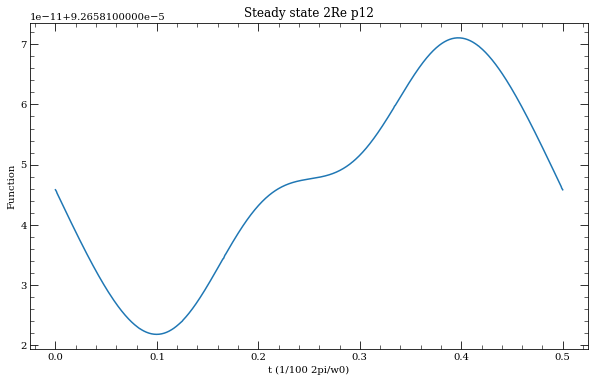

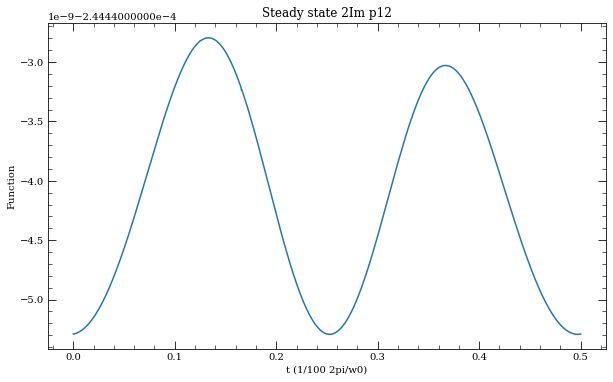

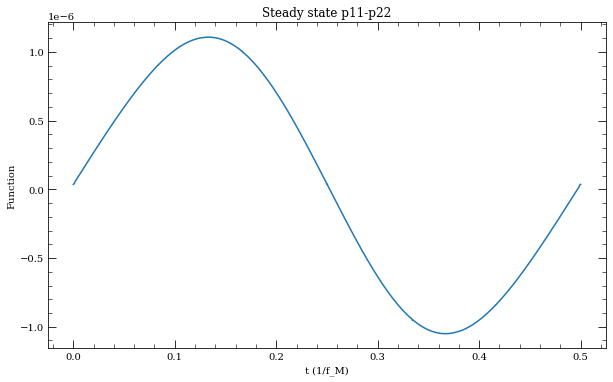

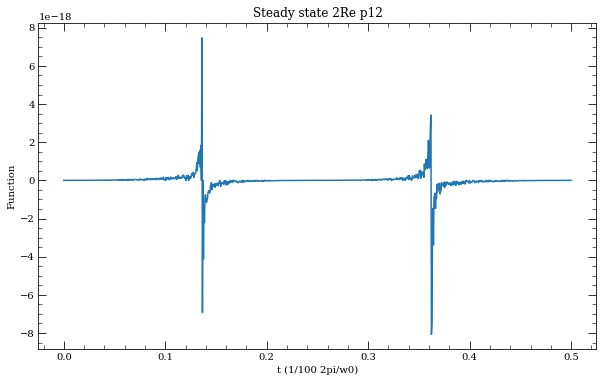

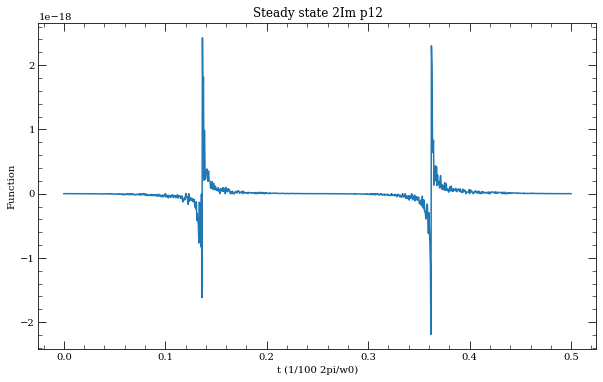

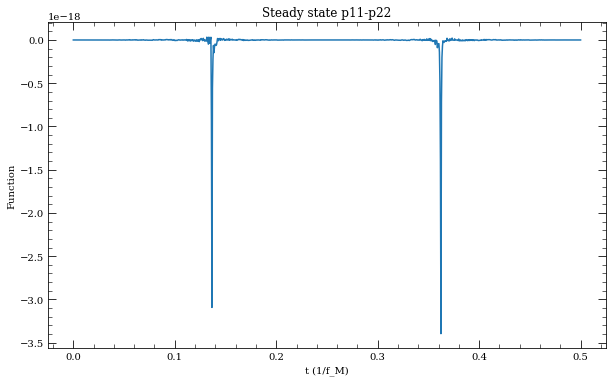

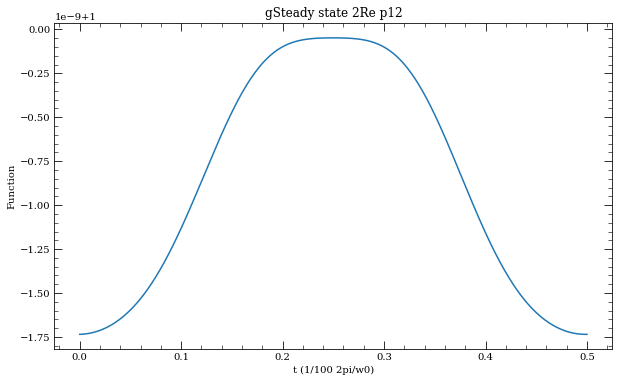

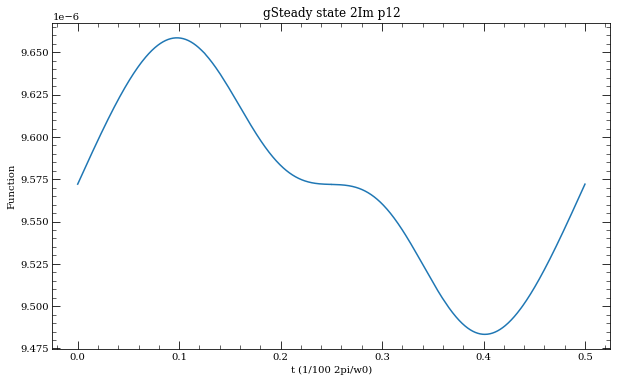

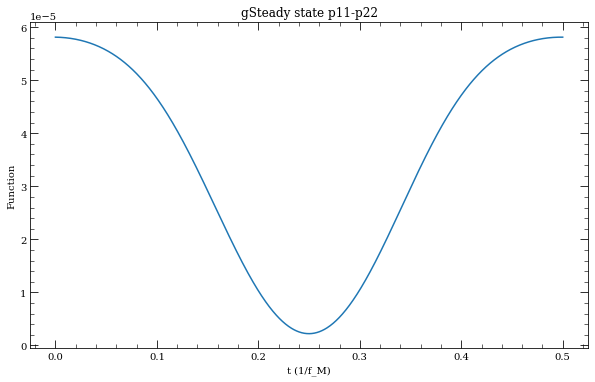

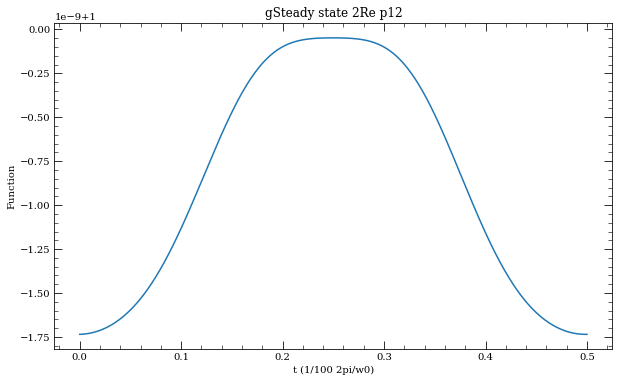

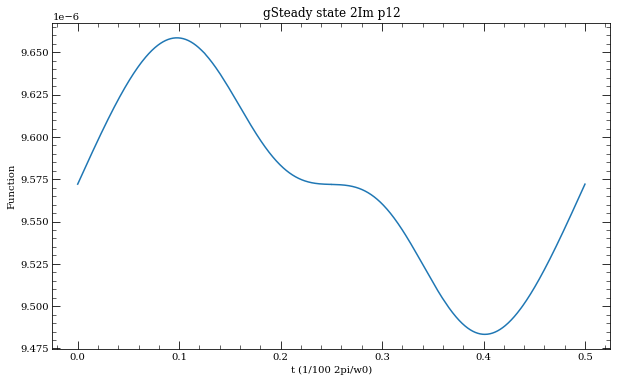

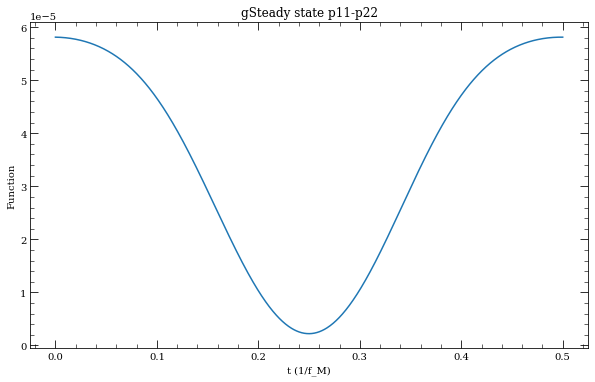

In [11]:
timestoeval=np.linspace(0.000*argz['t_m'],(2.000)*argz['t_m'],1000)
f1r=np.empty((0, 4))
f1i=np.empty((0, 4))
f2r=np.empty((0, 4))
f2i=np.empty((0, 4))
f3r=np.empty((0, 4))
f3i=np.empty((0, 4))
f4r=np.empty((0, 4))
f4i=np.empty((0, 4))
g1r=np.empty((0, 4))
g1i=np.empty((0, 4))
g2r=np.empty((0, 4))
g2i=np.empty((0, 4))
g3r=np.empty((0, 4))
g3i=np.empty((0, 4))
g4r=np.empty((0, 4))
g4i=np.empty((0, 4))
ev1r0=np.empty((0, 4))
ev1i0=np.empty((0, 4))

#Decomposition of 4x4 matrix with 4th row of zeroes, assuming diagonalizable matrix
def fourEigen(X):
    A1k=X[0,0]
    A2k=X[1,1]
    A3k=X[2,2]
    B1k=X[0,1]
    B2k=X[1,0]
    E1k=X[0,2]
    E2k=X[2,0]
    D1k=X[0,3]
    D2k=X[1,3]
    D3k=X[2,3]
    C1k=X[1,2]
    C2k=X[2,1]
    
    Kz=2*A1k**3 - 3*A1k**2*A2k - 3*A1k*A2k**2 + 2*A2k**3 - 3*A1k**2*A3k + 12*A1k*A2k*A3k -\
    3*A2k**2*A3k - 3*A1k*A3k**2 - 3*A2k*A3k**2 + 2*A3k**3 + 9*A1k*B1k*B2k +\
    9*A2k*B1k*B2k - 18*A3k*B1k*B2k - 18*A1k*C1k*C2k + 9*A2k*C1k*C2k + 9*A3k*C1k*C2k +\
    27*B2k*C2k*E1k + 27*B1k*C1k*E2k + 9*A1k*E1k*E2k - 18*A2k*E1k*E2k +9*A3k*E1k*E2k +\
    np.sqrt(-4*(A1k**2 + A2k**2 - A2k*A3k + A3k**2 - A1k*(A2k + A3k) + 3*B1k*B2k +\
                3*C1k*C2k + 3*E1k*E2k)**3 +(2*A1k**3 + 2*A2k**3 - 3*A2k**2*A3k + 2*A3k**3 -\
                                            3*A1k**2*(A2k + A3k) - 18*A3k*B1k*B2k + 9*A3k*C1k*C2k +\
                                            27*B2k*C2k*E1k + 27*B1k*C1k*E2k + 9*A3k*E1k*E2k - \
                                            3*A1k*(A2k**2 - 4*A2k*A3k + A3k**2 - 3*B1k*B2k + 6*C1k*C2k -\
                                                   3*E1k*E2k) -3*A2k*(A3k**2 - 3*B1k*B2k - 3*C1k*C2k + 6*E1k*E2k))**2)
    
    
    Lz=-A1k**2 + A1k*A2k - A2k**2 + A1k*A3k + A2k*A3k - A3k**2 - 3*B1k*B2k - 3*C1k*C2k -3*E1k*E2k
    
    Ev=np.array([0.0,1.0/3.0*((A1k+A2k+A3k)+(Kz/2.0)**(1/3)-(2.0/Kz)**(1/3)*Lz),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*2.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*2.0*np.pi/3)*Lz*(2.0/Kz)**(1/3)),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*4.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*4.0*np.pi/3)*Lz*(2.0/Kz)**(1/3))])
    Ev1=np.array([0.0,1.0/3.0*((A1k+A2k+A3k)+(Kz/2.0)**(1/3)-(2.0/Kz)**(1/3)*Lz),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*2.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*2.0*np.pi/3)*Lz*(2.0/Kz)**(1/3)),\
                1.0/3.0*((A1k+A2k+A3k)+np.exp(1j*4.0*np.pi/3)*(Kz/2.0)**(1/3)-np.exp(-1j*4.0*np.pi/3)*Lz*(2.0/Kz)**(1/3))])

    
    Evx1=1/np.sqrt(2.0)*np.array([-((A2k*A3k*D1k - C1k*C2k*D1k - A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k -A2k*D3k*E1k)/\
                     (A1k*A2k*A3k - A3k*B1k*B2k - A1k*C1k*C2k + B2k*C2k*E1k +B1k*C1k*E2k - A2k*E1k*E2k)),\
                   -(((-A3k)*B2k*D1k + A1k*A3k*D2k - A1k*C1k*D3k + B2k*D3k*E1k + C1k*D1k*E2k - D2k*E1k*E2k)/\
                     (A1k*A2k*A3k - A3k*B1k*B2k - A1k*C1k*C2k + B2k*C2k*E1k + B1k*C1k*E2k - A2k*E1k*E2k)),\
                   -((B2k*C2k*D1k - A1k*C2k*D2k + A1k*A2k*D3k - B1k*B2k*D3k - A2k*D1k*E2k +B1k*D2k*E2k)/\
                     (A1k*A2k*A3k - A3k*B1k*B2k - A1k*C1k*C2k + B2k*C2k*E1k +B1k*C1k*E2k - A2k*E1k*E2k)), 1])
    
   
    
    Evx2=np.array([(-A3k +Ev1[1] + (C2k*(A3k*B2k - C1k*E2k - B2k*Ev1[1]))/(B2k*C2k - A2k*E2k + E2k*Ev1[1]))/\
                   (E2k), -((A3k*B2k - C1k*E2k - B2k*Ev1[1])/((B2k*C2k - A2k*E2k + E2k*Ev1[1]))), 1.0, 0.0])
    
    Evx3=np.array([(-A3k +Ev1[2] + (C2k*(A3k*B2k - C1k*E2k - B2k*Ev1[2]))/(B2k*C2k - A2k*E2k + E2k*Ev1[2]))/\
                   (E2k), -((A3k*B2k - C1k*E2k - B2k*Ev1[2])/((B2k*C2k - A2k*E2k + E2k*Ev1[2]))), 1.0, 0.0])
    
    Evx4=np.array([(-A3k +Ev1[3] + (C2k*(A3k*B2k - C1k*E2k - B2k*Ev1[3]))/(B2k*C2k - A2k*E2k + E2k*Ev1[3]))/\
                   (E2k), -((A3k*B2k - C1k*E2k - B2k*Ev1[3])/((B2k*C2k - A2k*E2k + E2k*Ev1[3]))), 1.0, 0.0])
    
    Evx1=Evx1
    Evx2=Evx2/ling.norm(Evx2)
    Evx3=Evx3/ling.norm(Evx3)
    Evx4=Evx4/ling.norm(Evx4)
    
    LEv1=np.array([0.0,0.0,0.0,1.0])
    
    LEv2=np.array([-((A2k*A3k*Ev1[1] - C1k*C2k*Ev1[1] - A2k*Ev1[1]**2 - A3k*Ev1[1]**2 + Ev1[1]**3)/\
                     ((-A2k)*A3k*D1k +C1k*C2k*D1k + A3k*B1k*D2k - B1k*C1k*D3k - C2k*D2k*E1k + A2k*D3k*E1k +\
                      A2k*D1k*Ev1[1] + A3k*D1k*Ev1[1] - B1k*D2k*Ev1[1] - D3k*E1k*Ev1[1] - D1k*Ev1[1]**2)),\
                   -((A3k*B1k*Ev1[1] - C2k*E1k*Ev1[1] - B1k*Ev1[1]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                    A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[1] -\
                    A3k*D1k*Ev1[1] + B1k*D2k*Ev1[1] + D3k*E1k*Ev1[1] + D1k*Ev1[1]**2)),\
                   -(((-B1k)*C1k*Ev1[1] + A2k*E1k*Ev1[1] - E1k*Ev1[1]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                       A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[1] -\
                                                                           A3k*D1k*Ev1[1] + B1k*D2k*Ev1[1] + D3k*E1k*Ev1[1] + D1k*Ev1[1]**2)), 1])
    
    LEv3=np.array([-((A2k*A3k*Ev1[2] - C1k*C2k*Ev1[2] - A2k*Ev1[2]**2 - A3k*Ev1[2]**2 + Ev1[2]**3)/\
                     ((-A2k)*A3k*D1k +C1k*C2k*D1k + A3k*B1k*D2k - B1k*C1k*D3k - C2k*D2k*E1k + A2k*D3k*E1k +\
                      A2k*D1k*Ev1[2] + A3k*D1k*Ev1[2] - B1k*D2k*Ev1[2] - D3k*E1k*Ev1[2] - D1k*Ev1[2]**2)),\
                   -((A3k*B1k*Ev1[2] - C2k*E1k*Ev1[2] - B1k*Ev1[2]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                    A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[2] -\
                    A3k*D1k*Ev1[2] + B1k*D2k*Ev1[2] + D3k*E1k*Ev1[2] + D1k*Ev1[2]**2)),\
                   -(((-B1k)*C1k*Ev1[2] + A2k*E1k*Ev1[2] - E1k*Ev1[2]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                       A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[2] -\
                                                                           A3k*D1k*Ev1[2] + B1k*D2k*Ev1[2] + D3k*E1k*Ev1[2] + D1k*Ev1[2]**2)), 1])
    
    LEv4=np.array([-((A2k*A3k*Ev1[3] - C1k*C2k*Ev1[3] - A2k*Ev1[3]**2 - A3k*Ev1[3]**2 + Ev1[3]**3)/\
                     ((-A2k)*A3k*D1k +C1k*C2k*D1k + A3k*B1k*D2k - B1k*C1k*D3k - C2k*D2k*E1k + A2k*D3k*E1k +\
                      A2k*D1k*Ev1[3] + A3k*D1k*Ev1[3] - B1k*D2k*Ev1[3] - D3k*E1k*Ev1[3] - D1k*Ev1[3]**2)),\
                   -((A3k*B1k*Ev1[3] - C2k*E1k*Ev1[3] - B1k*Ev1[3]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                    A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[3] -\
                    A3k*D1k*Ev1[3] + B1k*D2k*Ev1[3] + D3k*E1k*Ev1[3] + D1k*Ev1[3]**2)),\
                   -(((-B1k)*C1k*Ev1[3] + A2k*E1k*Ev1[3] - E1k*Ev1[3]**2)/(A2k*A3k*D1k - C1k*C2k*D1k -\
                       A3k*B1k*D2k + B1k*C1k*D3k + C2k*D2k*E1k - A2k*D3k*E1k - A2k*D1k*Ev1[3] -\
                                                                           A3k*D1k*Ev1[3] + B1k*D2k*Ev1[3] + D3k*E1k*Ev1[3] + D1k*Ev1[3]**2)), 1])
    
    P=np.column_stack((Evx1,Evx2,Evx3,Evx4))
    Pinv=np.row_stack((LEv1/np.inner(LEv1,Evx1),LEv2/np.inner(LEv2,Evx2),LEv3/np.inner(LEv3,Evx3),LEv4/np.inner(LEv4,Evx4)))
    #Pinv=np.row_stack((LEv1/ling.norm(LEv1),LEv2/ling.norm(LEv2),LEv3/ling.norm(LEv3),LEv4/ling.norm(LEv4)))
    #display(Ev1)
    return Ev,P,Pinv
          
        

#Floquet decomposition using time dependent effective Floquet Liouvillian generator K_{t0} for all times {t': 0<t'<T}
def floquet_solver(tx,args):
 
    Uxx=Kt0(tx,args)
    #With Rotation
    #Uxx=UtR(tx+2.0*args['t_m'],tx,args)
    #display(Matrix(Uxx))
    if Matrix(Uxx).is_diagonalizable() == False:
        display('Non-Diagonalizable matrix encountered!')
    #Uxpx, Uxdx = Matrix(Uxx).diagonalize()
    Ev,P,Pi=fourEigen(Uxx)
    Ev1,Ev2,Ev3,Ev4=P[:,0],P[:,1],P[:,2],P[:,3]
    LEv1,LEv2,LEv3,LEv4=Pi[0,:],Pi[1,:],Pi[2,:],Pi[3,:]
    #ev1r0x=np.real(1/(2*argz['t_m'])*np.log([[Uxdx[0,0],Uxdx[1,1],Uxdx[2,2],Uxdx[3,3]]]))
    #ev1i0x=np.imag(1/(2*argz['t_m'])*np.log([[Uxdx[0,0],Uxdx[1,1],Uxdx[2,2],Uxdx[3,3]]]))
    #Uxpx=np.array(Uxpx).astype(complex)
    ev1r0x=np.array([np.real(Ev)])
    ev1i0x=np.array([np.imag(Ev)])               
    f1x=np.array([Ev1]).astype(complex)
    f2x=np.array([Ev2]).astype(complex)
    f3x=np.array([Ev3]).astype(complex)
    f4x=np.array([Ev4]).astype(complex)
    g1x=np.array([LEv1]).astype(complex)
    g2x=np.array([LEv2]).astype(complex)
    g3x=np.array([LEv3]).astype(complex)
    g4x=np.array([LEv4]).astype(complex)
    
    #f1x=np.array([Uxpx[:,0]]).astype(complex)
    #f2x=np.array([Uxpx[:,1]]).astype(complex)
    #f3x=np.array([Uxpx[:,2]]).astype(complex)
    #f4x=np.array([Uxpx[:,3]]).astype(complex)
    #display(np.real(np.array(Uxd).astype(complex)))
    #display(np.real([Uxdx[0,0],Uxdx[1,1],Uxdx[2,2],Uxdx[3,3]]))
       
    '''
    with np.nditer(Uxpx, op_flags=['readwrite']) as it:
       for x in it:
        if np.abs(x)<1E-10:
            x[...] = 0.0
        elif np.abs(np.real(x))<1E-10:
            x[...] = x-np.real(x)
        elif np.abs(np.imag(x))<1E-10:
            x[...] = x-1.0j*np.imag(x)
    '''
    
   
    '''
    if np.tan(np.angle(f1x[0][0]))<-np.pi/4 or np.angle(f1x[0][0])>np.pi/4:
        
        f1x=f1x*(np.exp(1j*(np.angle(f1x[0][0]))))
        
    if np.tan(np.angle(f2x[0][0]))<-np.pi/4 or np.angle(f2x[0][0])>np.pi/4:
        f2x=-f2x*(1.0j)
    
    if np.tan(np.angle(f3x[0][0]))<0 or np.angle(f3x[0][0])>np.pi/4:
        f3x=-f3x*(np.exp(1j*(0.5*np.angle(f3x[0][2]))))
    '''   
    
    return ev1r0x,ev1i0x,f1x,f2x,f3x,f4x,g1x,g2x,g3x,g4x

#Loop
ind=0
for t in timestoeval:
    Uxxd=floquet_solver(t,argz)
    #display(ind)   
    #display(ev1r0)
    #display(1)
    #display(t)    
    ev1r0=np.append(ev1r0,Uxxd[0],axis=0)
    ev1i0=np.append(ev1i0,Uxxd[1],axis=0)
    f1r=np.append(f1r,np.real(Uxxd[2]),axis=0)
    f1i=np.append(f1i,np.imag(Uxxd[2]),axis=0)
    g1r=np.append(g1r,np.real(Uxxd[6]),axis=0)
    g1i=np.append(g1i,np.imag(Uxxd[6]),axis=0)

    f3r=np.append(f3r,np.real(Uxxd[4]),axis=0)
    f3i=np.append(f3i,np.imag(Uxxd[4]),axis=0)
    f4r=np.append(f4r,np.real(Uxxd[5]),axis=0)
    f4i=np.append(f4i,np.imag(Uxxd[5]),axis=0)
    
    g3r=np.append(g3r,np.real(Uxxd[8]),axis=0)
    g3i=np.append(g3i,np.imag(Uxxd[8]),axis=0)
    g4r=np.append(g4r,np.real(Uxxd[9]),axis=0)
    g4i=np.append(g4i,np.imag(Uxxd[9]),axis=0)
    
    if np.real(Uxxd[3][0][0])>0:
        f2r=np.append(f2r,np.real(Uxxd[3]),axis=0)
        f2i=np.append(f2i,np.imag(Uxxd[3]),axis=0)
        g2r=np.append(g2r,np.real(Uxxd[7]),axis=0)
        g2i=np.append(g2i,np.imag(Uxxd[7]),axis=0)
    else:
        f2r=np.append(f2r,-1.0*np.real(Uxxd[3]),axis=0)
        f2i=np.append(f2i,-1.0*np.imag(Uxxd[3]),axis=0)
        g2r=np.append(g2r,-1.0*np.real(Uxxd[7]),axis=0)
        g2i=np.append(g2i,-1.0*np.imag(Uxxd[7]),axis=0)
        
    
       
    #display(f1r[-1]+1.0j*f1i[-1])
   
   
    ind+=1
    

#display(ev1r0)
#display(ev1r0[0])
#display(ev1r0[1500])
#display(ev1i0[0])
#display(ev1i0[1500])
#display(f1r[0])
#display(f1r[100])
#display(f1r[211])
#display(f1r[323])

#Floquet quasienergy interpolants

evrint = interpolate.CubicSpline(timestoeval, ev1r0)
eviint = interpolate.CubicSpline(timestoeval, ev1i0)

#Floquet right quasieigenvector interpolants

f1rint = interpolate.CubicSpline(timestoeval, f1r)
f1iint = interpolate.CubicSpline(timestoeval, f1i)
f2rint = interpolate.CubicSpline(timestoeval, f2r)
f2iint = interpolate.CubicSpline(timestoeval, f2i)
f3rint = interpolate.CubicSpline(timestoeval, f3r)
f3iint = interpolate.CubicSpline(timestoeval, f3i)
f4rint = interpolate.CubicSpline(timestoeval, f4r)
f4iint = interpolate.CubicSpline(timestoeval, f4i)

#Floquet left quasieigenvector interpolants

g1rint = interpolate.CubicSpline(timestoeval, g1r)
g1iint = interpolate.CubicSpline(timestoeval, g1i)
g2rint = interpolate.CubicSpline(timestoeval, g2r)
g2iint = interpolate.CubicSpline(timestoeval, g2i)
g3rint = interpolate.CubicSpline(timestoeval, g3r)
g3iint = interpolate.CubicSpline(timestoeval, g3i)
g4rint = interpolate.CubicSpline(timestoeval, g4r)
g4iint = interpolate.CubicSpline(timestoeval, g4i)


display('Right eigenvectors')
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f1r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Re p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f1r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f1r[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state p11-p22')

display('Right eigenvectors')
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f1i[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Re p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f1i[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f1i[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state p11-p22')

display('Left eigenvectors')
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('gSteady state 2Re p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('gSteady state 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('gSteady state p11-p22')

display('Left eigenvectors')
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('gSteady state 2Re p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('gSteady state 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('gSteady state p11-p22')

'''
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 1 2Re p12')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel('Decoherence state 1 2Im p12')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2r[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 1 p11-p22')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f2i[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 1 p11-p22')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f3r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Re p12 Re part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f3i[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Re p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f3r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f3i[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Im p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f3r[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 p11-p22')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f4r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Re p12 Re part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f4i[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Re p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f4r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f4i[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Im p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, f4r[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 p11-p22')

display('Left eigenvectors')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g1r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Re p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g1r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g1r[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state p11-p22')



fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g2r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 1 2Re p12')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g2r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel('Decoherence state 1 2Im p12')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g2r[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 1 p11-p22')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g2i[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 1 p11-p22')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g3r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Re p12 Re part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g3i[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Re p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g3r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g3i[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 2Im p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g3r[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 2 p11-p22')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g4r[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Re p12 Re part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g4i[:,0], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Re p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g4r[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Im p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g4i[:,1], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 2Im p12 Im part')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, g4r[:,2], label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Decoherence state 3 p11-p22')
#display(Matrix(Uxp))
#display(corrfun(0.0,1000000.0,rho0,argz))
#display(integrate.quad(lambda x: corrfun2(x,0.01,rhoxx,argz),0.0,2.0*argz['t_m'],epsabs=1.0E-8, epsrel=1.0E-8, limit=200))


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1r0[:,1], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Quasienergy of Decoherence State 1')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1r0[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Quasienergy of Decoherence State 2')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1i0[:,2], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Quasienergy of  Decoherence State 2')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1r0[:,3], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Quasienergy Decoherence State 3')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1i0[:,3], label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Quasienergy of  Decoherence State 3')
'''

In [ ]:
display('Right eigenvectors')
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1r0, label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Re p12')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timestoeval, ev1i0, label="F")
axes0.set_xlabel('t (1/100 2pi/w0)')
axes0.set_ylabel(r'Function')
axes0.set_title('Steady state 2Im p12')

KtDx,KtPx,KtPxi=fourEigen(Kt0(0.0,argz))
#KtDx[0]=0.0
#KtPx[:,0]=KtPx[:,0]/np.sqrt(2.0)
#KtPx[0,:]=KtPx[0,:]*np.sqrt(2.0)
display(KtDx)
display(Matrix(KtPx))
display(Matrix(KtPxi))

DiMatpl=np.zeros((4,4),dtype=complex)
DiMatmi=np.zeros((4,4),dtype=complex)
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        DiMatpl[i,j]=KtPxi[i,:] @ sijt @ KtPx[:,j]
        
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        DiMatmi[i,j]=KtPxi[i,:] @ sij @ KtPx[:,j]

Dgz0i=DG1(0.0,argz)[1] 

def Rotbasc1(tx,op,args):
    Rotbas=np.zeros((4,4),dtype=complex)   
    wmod = args['wmod']
    tm = args['t_m']
    t1=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx1=interpolate.splev(t1,Fxrs)+1.0j*interpolate.splev(t1,Fxis)
    B1c=1-np.imag(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B2c=1-np.real(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B3c=np.cos(np.abs(Fx1))
    A1c=-np.imag(np.abs(Fx1))*np.real(np.abs(Fx1))*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    E1c=np.imag(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
    C1c=np.real(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
    
   
    Rotx=np.array([[B1c,A1c,E1c,0.0],[A1c,B2c,C1c,0.0],[-E1c,-C1c,B3c,0.0],[0.0+0.0j,0.0,0.0,1.0]],dtype=complex)
    Rotxt=np.transpose(Rotx)
    #display(Matrix(Rotx))
    for i in [0,1,2,3]:
        for j in [0,1,2,3]:
            Rotbas[i,j]=KtPxi[i,:][None,...] @ np.matmul(np.matmul(Rotx,op),Rotxt) @ KtPx[:,j][...,None]
    return Rotbas
#display(Rotbasc1(0.0,sij,argz))
def Rotbasc2(tx,op,args):
    Rotbas=np.zeros((4),dtype=complex)   
    wmod = args['wmod']
    tm = args['t_m']
    t1=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx1=interpolate.splev(t1,Fxrs)+1.0j*interpolate.splev(t1,Fxis)
    B1c=1-np.imag(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B2c=1-np.real(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B3c=np.cos(np.abs(Fx1))
    A1c=-np.imag(np.abs(Fx1))*np.real(np.abs(Fx1))*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    E1c=np.imag(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
    C1c=np.real(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
   
    Rotx=np.array([[B1c,A1c,E1c,0],[A1c,B2c,C1c,0],[-E1c,-C1c,B3c,0],[0,0,0,1.0]],dtype=complex)
    Rotxt=np.transpose(Rotx)
    #display(Matrix(np.matmul(np.matmul(Rotx,op),Rotxt)))
    #display(Matrix(op))
    #display(Matrix(Rotx))
    for i in [0,1,2,3]:
            Rotbas[i]=np.sqrt(2.0)*(np.array([0.0,0.0,0.0,1.0])[None,...])@\
            (np.matmul(np.matmul(Rotx,op),Rotxt) @ KtPx[:,i][...,None])
            
    return Rotbas
#display(Matrix(Rotbasc1(0.0,sij,argz)))
#display(Matrix(Rotbasc2(0.0,sijt,argz)))
def corrfunextk(tx,taux,rhox,args):
    Rotbas=np.zeros((4),dtype=complex)   
    wmod = args['wmod']
    tm = args['t_m']
    t1=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx1=interpolate.splev(t1,Fxrs)+1.0j*interpolate.splev(t1,Fxis)
    B1c=1-np.imag(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B2c=1-np.real(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B3c=np.cos(np.abs(Fx1))
    A1c=-np.imag(np.abs(Fx1))*np.real(np.abs(Fx1))*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    E1c=np.imag(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
    C1c=np.real(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
    Rotx=np.array([[B1c,A1c,E1c,0],[A1c,B2c,C1c,0],[-E1c,-C1c,B3c,0],[0,0,0,1.0]],dtype=complex)
    Rotxt=np.transpose(Rotx)
    
    Rotbas2=np.zeros((4),dtype=complex)    
    t2=tx+taux-1.0*np.floor((tx+taux)/(2.0*tm))*2.0*tm
    Fx2=interpolate.splev(t2,Fxrs)+1.0j*interpolate.splev(t2,Fxis)
    B1d=1-np.imag(np.abs(Fx2))**2*special.sinc(0.5*np.abs(Fx2)/np.pi)**2
    B2d=1-np.real(np.abs(Fx2))**2*special.sinc(0.5*np.abs(Fx2)/np.pi)**2
    B3d=np.cos(np.abs(Fx2))
    A1d=-np.imag(np.abs(Fx2))*np.real(np.abs(Fx2))*special.sinc(0.5*np.abs(Fx2)/np.pi)**2
    E1d=np.imag(np.abs(Fx2))*special.sinc(np.abs(Fx2)/np.pi)
    C1d=np.real(np.abs(Fx2))*special.sinc(np.abs(Fx2)/np.pi)
    Rotx2=np.array([[B1d,A1d,E1d,0],[A1d,B2d,C1d,0],[-E1d,-C1d,B3d,0],[0,0,0,1.0]],dtype=complex)
    Rotx2t=np.transpose(Rotx2)
    termm=np.zeros((4),dtype=complex)  
    Rotbasx=np.matmul(np.matmul(Rotx,sij),Rotxt)
    Rotbasx2=np.matmul(np.matmul(Rotx2,sijt),Rotx2t)
    for k1 in [0,1,2,3]:
        for n1 in [0,1,2,3]:
            termm+=np.sqrt(2.0)*np.exp((KtDx[k1]*taux+KtDx[n1]*tx))*\
            np.matmul(Rotbasx2,KtPx[:,k1][...,None]@ KtPxi[k1,:][None,...])@\
            np.matmul(Rotbasx,KtPx[:,n1][...,None]@ KtPxi[n1,:][None,...]) @ rhox
    return termm[-1]


def corrfunext(tx,taux,rhox,args):
    
    Rotbas=np.zeros((4),dtype=complex)   
    wmod = args['wmod']
    tm = args['t_m']
    t1=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    #Fx1=interpolate.splev(t1,Fxrs)+1.0j*interpolate.splev(t1,Fxis)
    '''
    B1c=1-np.imag(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B2c=1-np.real(np.abs(Fx1))**2*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    B3c=np.cos(np.abs(Fx1))
    A1c=-np.imag(np.abs(Fx1))*np.real(np.abs(Fx1))*special.sinc(0.5*np.abs(Fx1)/np.pi)**2
    E1c=np.imag(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)
    C1c=np.real(np.abs(Fx1))*special.sinc(np.abs(Fx1)/np.pi)    
    Rotx=np.array([[B1c,A1c,E1c,0],[A1c,B2c,C1c,0],[-E1c,-C1c,B3c,0],[0,0,0,1.0]],dtype=complex)
    Rotxt=np.transpose(Rotx)
    '''
    Rotx=Rotint(t1)
    Rotxt=np.transpose(Rotx)
    
    #For small micromotion
    #Gzzt=G(t1,argz)
    #DGzt=np.matmul(np.identity((4),dtype=complex)+Gzzt,np.identity((4),dtype=complex)-G0x)
    Dgtx=DG1int(t1)
    Dgtxi=np.transpose(Dgtx)
    DGzt=Dgtx @ Dgz0i
    
    Rotbas2=np.zeros((4),dtype=complex)    
    t2=tx+taux-1.0*np.floor((tx+taux)/(2.0*tm))*2.0*tm
    #Fx2=interpolate.splev(t2,Fxrs)+1.0j*interpolate.splev(t2,Fxis)
    '''
    B1d=1-np.imag(np.abs(Fx2))**2*special.sinc(0.5*np.abs(Fx2)/np.pi)**2
    B2d=1-np.real(np.abs(Fx2))**2*special.sinc(0.5*np.abs(Fx2)/np.pi)**2
    B3d=np.cos(np.abs(Fx2))
    A1d=-np.imag(np.abs(Fx2))*np.real(np.abs(Fx2))*special.sinc(0.5*np.abs(Fx2)/np.pi)**2
    E1d=np.imag(np.abs(Fx2))*special.sinc(np.abs(Fx2)/np.pi)
    C1d=np.real(np.abs(Fx2))*special.sinc(np.abs(Fx2)/np.pi)
    Rotx2=np.array([[B1d,A1d,E1d,0],[A1d,B2d,C1d,0],[-E1d,-C1d,B3d,0],[0,0,0,1.0]],dtype=complex)
    Rotx2t=np.transpose(Rotx2)    
    '''
    termm=np.zeros((4),dtype=complex)
    termm2=np.zeros((4),dtype=complex)
    Rotx2=Rotint(t2)
    Rotx2t=np.transpose(Rotx2)
    
    Rotbasx=np.matmul(np.matmul(Rotx,sij),Rotxt)
    Rotbasx2=np.matmul(sijt,Rotx2t)
    Rotbasy=np.matmul(np.matmul(Rotx,sijt),Rotxt)
    Rotbasy2=np.matmul(sij,Rotx2t)
    rhoxt=np.array([rhox[0],-rhox[1],rhox[2],rhox[3]])
    #For small micromotion
    #Gzzt2=G(t2,argz)
    #DGzt2=np.matmul(np.identity((4),dtype=complex)+Gzzt2,np.identity((4),dtype=complex)-G0x)
    DGzt2=DG1int(t2)*Dgtxi
    
    KtDxt=evrint(t1)+1.0j*eviint(t1)
    KtDxtau=evrint(t2)+1.0j*eviint(t2)
    
    KtPzt=np.column_stack((f1rint(t1)+1.0j*f1iint(t1),f2rint(t1)+1.0j*f2iint(t1),f3rint(t1)+1.0j*f3iint(t1),f4rint(t1)+1.0j*f4iint(t1)))
    KtPzti=np.row_stack((g1rint(t1)+1.0j*g1iint(t1),g2rint(t1)+1.0j*g2iint(t1),g3rint(t1)+1.0j*g3iint(t1),g4rint(t1)+1.0j*g4iint(t1)))
    
    KtPztau=np.column_stack((f1rint(t2)+1.0j*f1iint(t2),f2rint(t2)+1.0j*f2iint(t2),f3rint(t2)+1.0j*f3iint(t2),f4rint(t2)+1.0j*f4iint(t2)))
    KtPztaui=np.row_stack((g1rint(t2)+1.0j*g1iint(t2),g2rint(t2)+1.0j*g2iint(t2),g3rint(t2)+1.0j*g3iint(t2),g4rint(t2)+1.0j*g4iint(t2)))
    for k1 in [0,1,2,3]:
        for n1 in [0,1,2,3]:
            termm+=np.sqrt(2.0)*np.exp((KtDxt[k1]*taux+KtDxtau[n1]*tx))*\
            np.matmul(np.matmul(Rotbasx2,DGzt2),KtPztau[:,k1][...,None]@ KtPztaui[k1,:][None,...])@\
            np.matmul(np.matmul(Rotbasx, DGzt),KtPzt[:,n1][...,None]@ KtPzti[n1,:][None,...]) @ rhox
            
            '''
            termm2+= np.sqrt(2.0)*np.exp((KtDxt[k1]*taux+KtDxtau[n1]*tx))*\
            np.matmul(np.matmul(Rotbasx,DGzt),KtPzt[:,n1][...,None]@ KtPzti[n1,:][None,...]) @ rhox
            np.matmul(np.matmul(Rotbasx2,DGzt2),KtPztau[:,k1][...,None]@ KtPztaui[k1,:][None,...])@ rhox
            '''
            
            termm2+=np.transpose(np.sqrt(2.0)*np.exp((KtDxt[k1]*taux+KtDxtau[n1]*tx))*\
            np.matmul(np.matmul(Rotbasy2,DGzt2),KtPztau[:,k1][...,None]@ KtPztaui[k1,:][None,...])@\
            np.matmul(np.matmul(Rotbasy, DGzt),KtPzt[:,n1][...,None]@ KtPzti[n1,:][None,...]) @ rhoxt)
    return termm[-1]-1.0*termm2[-1]


rhozx1=np.array([0.0,0.0,1.0,1.0/sqrt(2.0)],dtype=complex)   
display(corrfunext(1.0E9+0.1,1000000.0,rhozx1,argz))
display((np.matmul(sijt,sij) @ rhozx1))
termd=np.zeros((4,4),dtype=complex) 
for i in [0,1,2,3]:
    termd+=KtPx[:,i][...,None]@ KtPxi[i,:][None,...]
display(np.outer(KtPx[:,i],KtPxi[i,:]))   
display(Matrix(termd-np.identity(4)))
#display(Matrix(Kt0(0.0,argz)))
#display(Matrix(KtPx@KtPxi))
display('Check')

term=np.zeros((4,4),dtype=complex)
for k1,n1 in itertools.permutations([0,1,2,3],2):
        term+=(KtPxi[k1,:] @sij @ KtPx[:,n1])
display(Kt0(0.0,argz))
display(KtPx @ np.diag(KtDx) @ KtPxi)


In [ ]:




#display(1/(2.0E6)*integrate.quad(lambda x: np.real(corrfun(x,0.0,rhoxx,argz)),-1.0E6*argz['t_m'],1.0E6*argz['t_m'])[0])
#display(1/(2.0E6)*integrate.quad(lambda x: np.imag(corrfun(x,0.0,rhoxx,argz)),-1.0E6*argz['t_m'],1.0E6*argz['t_m'])[0])

'''
result01r=[integrate.quad(lambda x: np.real(corrfun(x,y,rhoxx,argz)),0.0,2.0*argz['t_m'])[0] for y in timesx]
result01i=[integrate.quad(lambda x: np.imag(corrfun(x,y,rhoxx,argz)),0.0,2.0*argz['t_m'])[0] for y in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, result01r, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, result01i, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

np.savetxt('Correlation2.csv', list(zip(timesx,result01r,result01i)), delimiter=',')
'''
ti=0.0*argz['t_m']
tfin=100000.0*argz['t_m']
nstep=100000
timesxyz=np.linspace(ti,tfin,nstep)
tlen=timesxyz.size
tstep=(tfin-ti)/tlen
#timesx=np.sort(np.append(timesx,1.4830597729245))
rhoxx=KtP[-1]
#resultxx=[np.real(corrfun(x,0.0,rhoxx,argz)) for x in timesx]
'''
resultxxr=[np.real(dipole(x,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxxr, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

#resultxx=[np.imag(corrfun(x,0.0,rhoxx,argz)) for x in timesx]
resultxxi=[np.imag(dipole(x,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxxi, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')
'''
#np.savetxt('Correlation2.csv', list(zip(timesx,resultxxr,resultxxi)), delimiter=',')

resultxx2r=[np.real(corrfunext(1.0E9,x,rhozx1,argz)) for x in timesxyz]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesxyz, resultxx2r, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

resultxx2i=[np.imag(corrfunext(1.0E9,x,rhozx1,argz)) for x in timesxyz]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesxyz, resultxx2i, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

'''
resultxx3r=[np.real(corrfunext(1.0E9+x,1.0E3,rhozx1,argz)) for x in timesxyz]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesxyz, resultxx3r, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

resultxx3i=[np.imag(corrfunext(1.0E9+x,1.0E3,rhozx1,argz)) for x in timesxyz]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesxyz, resultxx3i, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')
'''

np.savetxt('Correlation81.csv', list(zip(timesxyz,resultxx2r,resultxx2i)), delimiter=',')

spec1 = 2.0*tstep*sp.fft.fft([corrfunext(1.0E9+0.125,x,rhozx1,argz) for x in timesxyz])
#spec2 = 2.0*tstep*sp.fft.fft([corrfunext(1.0E9+300.4,x,rhozx1,argz) for x in timesxyz])
wlist=2.0*np.pi*sp.fft.fftfreq(nstep,tstep)

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(wlist, np.real(spec1), label="F")
axes0.set_xlabel('w')
axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Spectrum')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(wlist, np.imag(spec1), label="F")
axes0.set_xlabel('w')
axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Spectrum')

'''
resultxx3r=[np.real(corrfunext(1.0E9+x,100000.0,rhozx1,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx3r, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Reversed Correlation')

resultxx3i=[np.imag(corrfunext(1.0E9+x,100000.0,rhozx1,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx3i, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Reversed Correlation')


fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(wlist, np.real(spec2), label="F")
axes0.set_xlabel('w')
axes0.set_ylabel('FFT')
axes0.set_xlim([-10.0, 10.0])
axes0.set_title('Spectrum +1.25 t')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(wlist, np.imag(spec2), label="F")
axes0.set_xlabel('w')
axes0.set_ylabel('FFT')
axes0.set_xlim([-10.0, 10.0])
axes0.set_title('Spectrum +1.25 t')
'''

'''
resultxx2=[np.real(corrfun(x,0.05,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx2, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

resultxx2=[np.imag(corrfun(x,0.05,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx2, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

resultxx2=[np.real(corrfun(0.100,x,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx2, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')


resultxx2=[np.imag(corrfun(0.100,x,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx2, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

resultxx2=[np.real(corrfun(0.165,x,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx2, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

resultxx2=[np.imag(corrfun(0.165,x,rhoxx,argz)) for x in timesx]

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(timesx, resultxx2, label="F")
axes0.set_xlabel('t (1/f_M)')
axes0.set_ylabel(r'Function')
axes0.set_title('Plot')

display(dipole(1.48305,rhoxx,argz))
display(dipole(1.483052,rhoxx,argz))
display(dipole(1.48306,rhoxx,argz))
display(dipole(1.0E4,rhoxx,argz))
'''


In [110]:
def Liouv2(tx,args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl = args['t_l']
    tc = args['t_c']
    tm = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w00 = args['w_0']
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)
    yzy1= args['gamma']
    yzy2= args['depha12']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    Gg1=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w00+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.cos(w00*(t-tl))
    
    Gg2=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w00+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.sin(w00*(t-tl))
    
    Lxh=np.array([[-(yzy1/2+yzy2),0.0,Gg2,0.0],
                  [0.0,-(yzy1/2+yzy2),Gg1,0.0],
                  [-Gg2,-Gg1,-yzy1,yzy1*np.sqrt(2.0)],
                  [0,0,0,0]])
    #display(Lxh)
    
    return Lxh
def Rot(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    B1c=1-0.5*np.imag((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)**2
    B2c=1-0.5*np.real((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)**2
    B3c=np.cos(np.abs(Fx))
    A1c=-1/2*np.imag((Fx))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)**2
    E1c=np.imag((Fx))*special.sinc(np.abs(Fx)/np.pi)
    C1c=np.real((Fx))*special.sinc(np.abs(Fx)/np.pi)
    Rotx=np.array([[B1c,A1c,-E1c,0],[A1c,B2c,-C1c,0],[E1c,C1c,B3c,0],[0,0,0,1.0]])
    return Rotx

def Rotd(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-0.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Fx=interpolate.splev(t,Fxrs)+1.0j*interpolate.splev(t,Fxis)
    Fxd=interpolate.splev(t,Fxdrs)+1.0j*interpolate.splev(t,Fxdis)
    Fxad=interpolate.splev(t,Fxadd)
    #display(Fxad)
    j0=special.sinc(0.5*np.abs(Fx)/np.pi)
    j0d=0.5*special.spherical_jn(0,0.5*np.abs(Fx),derivative=True)*Fxad
    j1=special.sinc(np.abs(Fx)/np.pi)
    j1d=special.spherical_jn(0,np.abs(Fx),derivative=True)*Fxad
    #display(j1d)
    B1c=-np.imag((Fx))*np.imag(Fxd)*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.imag((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    B2c=-np.real((Fx))*np.real(Fxd)*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.real((Fx))**2*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    B3c=-np.sin(np.abs(Fx))*Fxad
    A1c=-1/2*np.imag((Fxd))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)**2-\
        1/2*np.imag((Fx))*np.real((Fxd))*special.sinc(0.5*np.abs(Fx)/np.pi)**2-2*np.imag((Fx))*np.real((Fx))*special.sinc(0.5*np.abs(Fx)/np.pi)*j0d
    E1c=np.imag((Fxd))*special.sinc(np.abs(Fx)/np.pi)+np.imag((Fx))*j1d
    #display(E1c)
    C1c=np.real(Fxd)*special.sinc(np.abs(Fx)/np.pi)+np.real((Fx))*j1d
    Rotx=np.array([[B1c,A1c,-E1c,0],[A1c,B2c,-C1c,0],[E1c,C1c,B3c,0],[0,0,0,0.0]])
    
    return Rotx
def Liouv3(tx,args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl = args['t_l']
    tc = args['t_c']
    tm = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w00 = args['w_0']
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)
    yzy1= args['gamma']
    yzy2= args['depha12']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    Gg1=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w00+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.cos(w00*(t-tl))
    
    Gg2=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w00+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.sin(w00*(t-tl))
    
    Lxh=np.array([[-(yzy1/2+yzy2),0.0,-Gg2,0.0],
                  [0.0,-(yzy1/2+yzy2),-Gg1,0.0],
                  [Gg2,Gg1,-yzy1,yzy1*np.sqrt(2.0)],
                  [0,0,0,0]])
    
    Lxh0=np.array([[-(yzy1/2+yzy2),0.0,0.0,0.0],
              [0.0,-(yzy1/2+yzy2),0.0,0.0],
              [0.0,0.0,-yzy1,yzy1*np.sqrt(2.0)],
              [0,0,0,0]])
    #display(Lxh)
    Rx=Rot(tx,args)
    return np.transpose(Rx)@(Lxh)@Rx-1.0*np.transpose(Rotd(tx,argz))@Rx
    #return np.transpose(Rx)@(Lxh-Lxh0)@Rx-np.transpose(Rotd(tx,args))@Rx

def Gaugetrans(tx,args):
    wmod = args['wmod']
    tm = args['t_m']
    t=tx-0.0*np.floor((tx)/(2.0*tm))*2.0*tm
    Rotzz=Rot(t,args)
    Rotdzz=Rotd(t,args)
    
    Fxdx=interpolate.splev(t,Fxdrs)+1.0j*interpolate.splev(t,Fxdis)-L(argz)
    Ldr=np.array([[0.0,0.0,-np.imag(Fxdx),0],[0.0,0.0,-np.real(Fxdx),0],[np.imag(Fxdx),np.real(Fxdx),0.0,0],[0,0,0,0.0]])
    
    return np.transpose(Rotzz)@np.matmul(Ldr,(Rotzz))-np.transpose(Rotdzz)@Rotzz

#Gauge Lindbladian terms interpolant

Ggint0=np.array(integrate.quad_vec(lambda x: 2.0*Gaugetrans(x,argz),0.0*argz['t_m'],2.0*argz['t_m'],epsabs=1e-12, epsrel=1e-12, limit=10000)[0])

from scipy.misc import derivative
tc=0.350
#x0=np.transpose(Rot(tc,argz))@(f3rint(tc)+1.0j*f3iint(tc))
Rotder=Rotd(tc,argz)
#display(x0)


Lv0=np.array(integrate.quad_vec(lambda x: Liouv3(x,argz)/(2.0*argz['t_m']),0.0*argz['t_m'],2.0*argz['t_m'],epsabs=1e-12, epsrel=1e-12, limit=10000)[0])
display(Matrix(Lv0))
display(Matrix(Lx))
Lx=Lv0

def Kt0(t0,args):
    DGzx,DGzxi=DG1(t0,args)
    return np.matmul(np.matmul(DGzx,Lx),DGzxi)

Kt00=Kt0(0.0,argz)
display(nling.cond(Kt00,p='fro'))
display(Matrix(Kt00).is_diagonalizable())
KtP,KtD=Matrix(Kt00).diagonalize()

KtD=np.diagonal(np.array(KtD,dtype=complex))
display(Matrix(KtD))
KtD=np.array([-3.1416e-06, -4.712e-06-7.368e-03j,\
              -4.712e-06+7.368e-03j,  0.0+0.0j])
#display(Matrix(KtP))
KtPi=KtP.inv()

#display(Matrix(KtPi))
KtP=np.array(KtP,dtype=complex)
KtPi=np.array(KtPi,dtype=complex)

def Ut(t,t0,args):
    DGzx=DG1(t,args)[0]
    DGzx0i=DG1(t0,args)[1]
    #display(Matrix(ling.expm(Gx)))
    Dt1= np.matmul(DGzx,DGzx0i)
    #display(Matrix(Dt1))
    return np.matmul(Dt1,ling.expm(Kt0(t0,args)*(t-t0)))
    #return ling.expm(Kt0(t0,args)*(t-t0))

def Ut0(t,args):
    DGzx=DG1(t,args)[0]
    Dt1= np.matmul(DGzx,D0yi)
    return np.matmul(Dt1,ling.expm(Kt00*(t)))

def UtR(t,t0,args):
    
    return np.matmul(np.matmul(np.transpose(Rot(t,args)),Ut(t,t0,args)),Rot(t0,args))
'''
x0d=np.transpose(Rot(tc,argz))@f3rint.derivative(nu=1)(tc)+1.0j*np.transpose(Rot(tc,argz))@f3iint.derivative(nu=1)(tc)+1.0*Rotder@(f3rint(tc)+1.0j*f3iint(tc))
derRot=np.vectorize(lambda x: Liouv3(x,argz))
#display(1/0.5*Matrix(integrate.quad_vec(lambda x: derRot(x),0.0,0.5)[0]))

display(Matrix(Ggint0))
display('Eigenvector')
display(f3rint(tc)+1.0j*f3iint(tc))
#display(x0)
#display(Liouv2(tc,argz)@x0)

display(Liouv3(tc,argz)@(f3rint(tc)+1.0j*f3iint(tc)))
#display(x0d)
display(ev1r0[0,2])
display(ev1i0[0,2])
display(Liouv2(tc,argz)@x0-x0d)
display('Check')
display(Liouv2(tc,argz)@x0-x0d)

#display((ev1r0[0,2]+1.0j*ev1i0[0,2])*x0)
display(Matrix(Liouv3(0.0,argz)))
display(Matrix(Liouv3(0.5,argz)))
display(Matrix(Rotd(0.5,argz)))
#display(G(0.375,argz))
'''

Matrix([
[-3.14159265434345e-6, -8.88800382962043e-7,  1.64850668710819e-7, -1.04781388712877e-10],
[  8.8880042170399e-7, -3.14160010924344e-6,  -0.0255987073548524,  1.37810366774819e-11],
[-1.64776577157841e-7,   0.0255987073451079, -6.28313782822561e-6,   8.88575533135544e-6],
[                   0,                    0,                    0,                     0]])

Matrix([
[-3.14159265434345e-6, -8.88800382962043e-7,  1.64850668710819e-7, -1.04781388712877e-10],
[  8.8880042170399e-7, -3.14160010924344e-6,  -0.0255987073548524,  1.37810366774819e-11],
[-1.64776577157841e-7,   0.0255987073451079, -6.28313782822561e-6,   8.88575533135544e-6],
[                   0,                    0,                    0,                     0]])

(inf+0j)

True

Matrix([
[-3.14159265555789e-6 - 1.43904708436794e-40*I],
[  -4.71236896812731e-6 + 0.0255987073177483*I],
[  -4.71236896812731e-6 - 0.0255987073177483*I],
[                                            0]])

"\nx0d=np.transpose(Rot(tc,argz))@f3rint.derivative(nu=1)(tc)+1.0j*np.transpose(Rot(tc,argz))@f3iint.derivative(nu=1)(tc)+1.0*Rotder@(f3rint(tc)+1.0j*f3iint(tc))\nderRot=np.vectorize(lambda x: Liouv3(x,argz))\n#display(1/0.5*Matrix(integrate.quad_vec(lambda x: derRot(x),0.0,0.5)[0]))\n\ndisplay(Matrix(Ggint0))\ndisplay('Eigenvector')\ndisplay(f3rint(tc)+1.0j*f3iint(tc))\n#display(x0)\n#display(Liouv2(tc,argz)@x0)\n\ndisplay(Liouv3(tc,argz)@(f3rint(tc)+1.0j*f3iint(tc)))\n#display(x0d)\ndisplay(ev1r0[0,2])\ndisplay(ev1i0[0,2])\ndisplay(Liouv2(tc,argz)@x0-x0d)\ndisplay('Check')\ndisplay(Liouv2(tc,argz)@x0-x0d)\n\n#display((ev1r0[0,2]+1.0j*ev1i0[0,2])*x0)\ndisplay(Matrix(Liouv3(0.0,argz)))\ndisplay(Matrix(Liouv3(0.5,argz)))\ndisplay(Matrix(Rotd(0.5,argz)))\n#display(G(0.375,argz))\n"

In [26]:
def Ut(t,t0,args):
    DGzx=DG1(t,args)[0]
    DGzx0i=DG1(t0,args)[1]
    #display(Matrix(ling.expm(Gx)))
    Dt1= np.matmul(DGzx,DGzx0i)
    #display(Matrix(Dt1))
    return np.matmul(Dt1,ling.expm(Kt0(t0,args)*(t-t0)))
    #return ling.expm(Kt0(t0,args)*(t-t0))

def Ut0(t,args):
    DGzx=DG1(t,args)[0]
    Dt1= np.matmul(DGzx,D0yi)
    return np.matmul(Dt1,ling.expm(Kt00*(t)))

def UtR(t,t0,args):
    
    return np.matmul(np.matmul(Rot(-t,args),Ut(t,t0,args)),Rot(t0,args))


tlistzx=np.linspace(0.0,1.0E2,10)
rholstz=[]
rholstx=[]
rholsty=[]
rho=np.array([0.0,0.0,1.0,1.0/sqrt(2.0)])
t0=0.0
t1=0.0
for t in tlistzx:
    t1=t
    rho=UtR(t1,t0,argz)@rho
    rholstx=np.append(rholstx,np.real(rho[0]))
    rholsty=np.append(rholsty,np.real(rho[1]))
    rholstz=np.append(rholstz,np.real(rho[2]))
    t0=t

display(rholstx)
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistzx, rholstx, label="Re Coh")
axes0.set_xlabel('t')
#axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Re Coh')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistzx, rholsty, label="Im Coh")
axes0.set_xlabel('t')
#axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Im Coh')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistzx, rholstz, label="Sigma_z")
axes0.set_xlabel('t')
#axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Sigma_z')

KeyboardInterrupt: 

Text(0.5, 1.0, 'Re Coh')

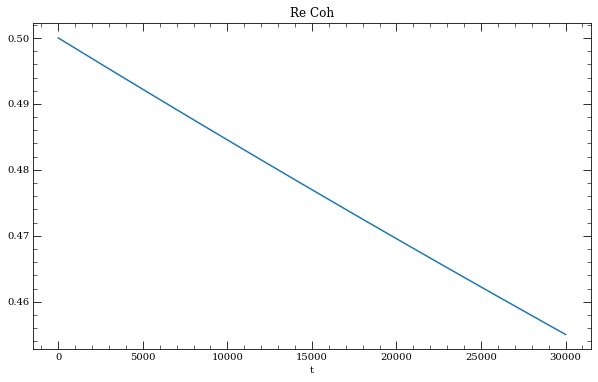

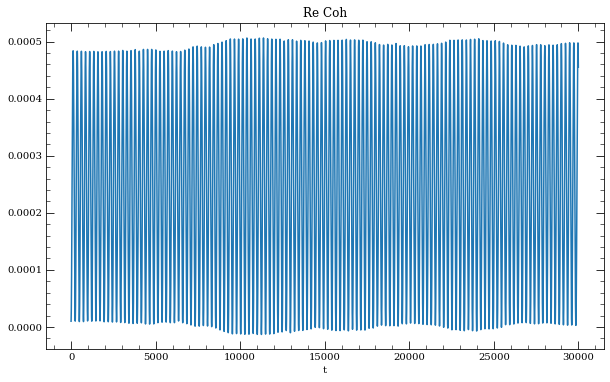

In [16]:
#import numpy as np
from odeintw import odeintw
def Liouv(tx,args):
    d = args['Delta1']
    R0 = args['Rabi']
    nt= args['Nterms']
    A = args['ModAmp']
    tl = args['t_l']
    tc = args['t_c']
    tm = args['t_m']
    tau = args['tau']
    wmod = args['wmod']
    w0 = args['w_0']
    M0 = argz['ModAmp']*argz['t_c']**2/(2.0*np.pi)
    y1= args['gamma']
    y2= args['depha12']
    t=tx-1.0*np.floor((tx)/(2.0*tm))*2.0*tm
    
    G1=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w0+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.cos(w0*(t-tl))
    
    G2=R0*np.exp(-(t-tc)**2/(2.0*tau**2))*\
               np.cos((w0+d)*(t-tl)+A*np.cos((wmod)*(t-tm)))*\
                np.sin(w0*(t-tl))
    
    Lx=np.array([[-(y1/2+y2),0,G2,0.0],
             [0,-(y1/2+y2),G1,0.0],
             [-G2,-G1,-y1,y1*np.sqrt(2.0)],
             [0,0,0,0]])
    
    return Lx
def asys(xn,t):
    return Liouv(t,argz)@ xn

x00=np.array([0.5,1.0E-5,0.0,1.0/np.sqrt(2.0)],dtype='float64')


tlistxzx = np.linspace(0,3.0E4,30000)
sol = odeintw(asys, x00, tlistxzx)

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistxzx, sol[:,0], label="Re Coh")
axes0.set_xlabel('t')
#axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Re Coh')

fig1, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistxzx, sol[:,1], label="Im Coh")
axes0.set_xlabel('t')
#axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Re Coh')

array([-1.71272889e-07+0.j,  2.55958715e-02+0.j,  9.99672372e-01+0.j,
        7.07106781e-01+0.j])

array([-1.45587329e-07-7.51831885e-23j,  2.55959518e-02+1.24296471e-20j,
        9.99672370e-01-3.16853646e-22j,  7.07106781e-01+0.00000000e+00j])

array([-3.47205562e-07+0.j,  2.56073110e-02+0.j,  9.99672079e-01+0.j,
        7.07106781e-01+0.j])

array([ 1.03516852e-04+7.13133658e-22j,  5.49271788e-01-1.10702477e-21j,
       -8.36012709e-01+4.75304778e-21j,  7.07106781e-01+0.00000000e+00j])

D:\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: zvode: Illegal input detected. (See printed message.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


Text(0.5, 1.0, 'Spectrum')

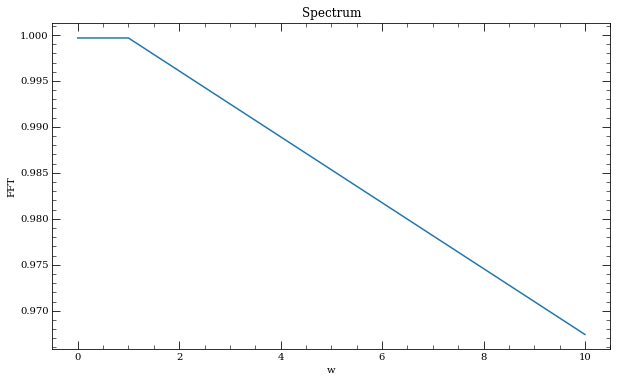

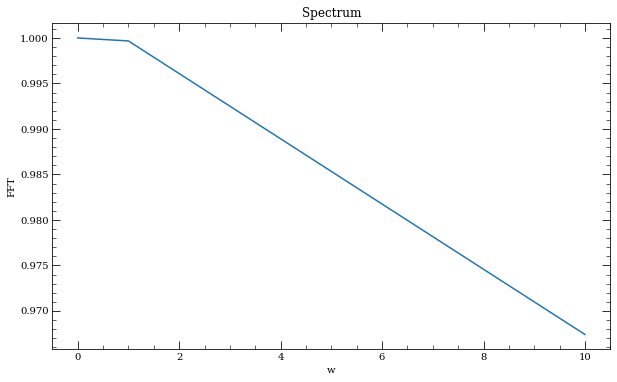

In [128]:
tlistxzx = [0.0,1.0E0,10]
x00=np.array([0.0,0.0,1.0,1.0/np.sqrt(2.0)],dtype='float64')
def deriv(t,x):
    
    return Liouv(t,argz)@[x[0],x[1],x[2],x[3]]
solx = sp.integrate.ode(deriv).set_integrator('zvode', method='bdf',atol=1.0E-15,rtol=1.0E-15,max_step=1.0E-4,nsteps=1.0E8)
solx.set_initial_value(x00, 0.0)
sol=solx.integrate([1.0,1.01])
display(sol)
display(UtR(0.0,1.0E0,argz)@x00)
sol=solx.integrate(1.01)
display(sol)

display(UtR(0.0,100.0E0,argz)@x00)
ulist=[]
sollist=[]
for x in tlistxzx:
    sollist=np.append(sollist, solx.integrate(x)[2])
    ulist=np.append(ulist, (UtR(0.0,x,argz)@x00)[2])
#display(sollist)
fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistxzx, np.real(sollist), label="F")
axes0.set_xlabel('w')
axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Spectrum')

fig0, axes0 = plt.subplots(1, 1, figsize=(10,6))
axes0.plot(tlistxzx, np.real(ulist), label="F")
axes0.set_xlabel('w')
axes0.set_ylabel('FFT')
#axes0.set_xlim([-0.02, 0.02])
#axes0.set_ylim([-1, 1])
axes0.set_title('Spectrum')